In [ ]:
# Install the tidyLPA package
install.packages("tidyLPA")

#Load in packages
library(tidyverse)
library(tidyLPA)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proto’, ‘plyr’, ‘gsubfn’, ‘coda’, ‘texreg’, ‘pander’, ‘fastDummies’, ‘checkmate’, ‘mclust’, ‘mix’, ‘MplusAutomation’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
You can use the function citation('tidyLPA') to create a citation for the use of {tidyLPA}.
Mplus is not installed. Use only package = 'mclust' when calling estimate_profiles().



##Time per Slide

In [ ]:
# Timestamp ranges:
# Group 1: 2022-11-03 07:11:43.686000+00:00 to 2023-09-28 19:58:25.536000+00:00
# Group 2: 2023-09-28 22:52:17.939000+00:00 to 2024-10-31 19:22:45.922000+00:00

#Time on slide in seconds

time_stats_1 <- read_csv("group1_slide_time.csv")
time_stats_2 <- read_csv("group2_slide_time.csv")

Rows: 222 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): person_name
dbl (36): Case Overview, Differential Diagnosis, Differential Diagnosis Revi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 182 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): person_name
dbl (36): Case Overview, Differential Diagnosis, Differential Diagnosis Revi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(time_stats_1)

person_name,Case Overview,Differential Diagnosis,Differential Diagnosis Revisited,Dilated Fundus Anatomy,Direct Ophthalmoscopy,Direct Ophthalmoscopy - 2,Direct Ophthalmoscopy - 3,Epilogue,Eye Examination,⋯,Practice: Dilated Fundus Anatomy,Practice: Matching Treatments,Practice: Refractive Error Classification,Reflecting Back,Reflecting Back - 2,Refractive Error Classification,Relevant History,Review: Dilated Fundus Anatomy,Rule Out A Diagnosis,Survey
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Person 1,16.196,127.684,71.141,11.248,32.099,19.893,133.755,42.833,49.648,⋯,26.185,46.444,66.156,169.994,118.540,39.142,62.612,21.600,71.084,0.809
Person 10,62.495,70.620,111.138,25.504,36.401,21.252,108.924,44.525,43.558,⋯,0.000,230.415,67.983,74.348,113.081,33.773,70.316,19.188,64.821,1.954
Person 100,24.935,1092.365,75.309,16.680,18.581,28.912,823.014,30.744,65.285,⋯,0.000,59.719,9078.318,116.699,59.696,21.871,62.583,59.142,132.300,0.000
Person 101,5.454,879.331,25.030,12.185,2189.240,22.866,58.908,65.004,57.853,⋯,18.027,108.279,24.194,171.083,157.991,23.730,63.696,12.776,34.890,0.039
Person 102,4.585,9.948,7.378,5.199,7.446,7.190,48.239,12.365,7.063,⋯,19.533,61.013,49.808,12.487,47.247,35.340,5.163,12.360,8.280,0.000
Person 103,4.921,407.457,31.652,8.306,19.385,12.473,42.329,37.186,1646.364,⋯,0.000,2220.535,250.901,36.493,25.043,19.251,42.111,12.633,12.344,0.000


In [ ]:
calculate_metrics <- function(df) {
      df |>
      mutate(Informative = (`Case Overview` + Epilogue + `History Taking` +
                          `Medical and Social History` + `Mr. Kato’s Dilated Fundus Exam` +
                          `Mr. Kato’s Eye Exam` + `Mr. Kato’s History` +
                          `Ocular History`) / 8,
            Assessment = (`Differential Diagnosis` + `Differential Diagnosis Revisited` +
                          `Direct Ophthalmoscopy` + `Direct Ophthalmoscopy - 2` +
                          `Eye Examination` + `History Taking Questions` + `Meet The Patient` +
                          `Mr. Kato’s History - 2` + `Patient Communication` + `Reflecting Back` +
                          `Reflecting Back - 2` + `Relevant History` + `Rule Out A Diagnosis`) / 13,
            Interactive = (`Dilated Fundus Anatomy` + `Direct Ophthalmoscopy - 3` +
                          `Identifying Vision Loss` + `Practice: Dilated Fundus Anatomy` +
                          `Practice: Matching Treatments` + `Practice: Refractive Error Classification` +
                          `Refractive Error Classification` + `Review: Dilated Fundus Anatomy` +
                          `Other Symptoms` + `Patient Referral`) / 10,
            Logistics = (`Learning Review` + `Mr Kato’s Vision Loss` + Survey) / 3) |>
      select(person_name, Informative, Assessment, Interactive, Logistics)
  }

#---------------------------------------------------------------------------------------------------------------------------------------------------#
time_categorized_1 <- calculate_metrics(time_stats_1)
time_categorized_2 <- calculate_metrics(time_stats_2)

head(time_categorized_1)
head(time_categorized_2)

person_name,Informative,Assessment,Interactive,Logistics
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 1,37.14313,72.84038,218.2581,27.4056667
Person 10,41.39563,60.89962,121.5513,18.6860000
Person 100,46.01512,149.63169,1019.7794,0.1206667
Person 101,316.59012,355.10023,51.6071,1.4530000
Person 102,10.64563,12.53808,35.5520,0.0460000
Person 103,16.09262,185.07577,339.5422,34.1723333


person_name,Informative,Assessment,Interactive,Logistics
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 223,2944.78925,2275.53792,30.9054,0.000
Person 224,52.76400,33.71438,22.1255,0.000
Person 225,14.70075,24.73892,25.3921,0.592
Person 226,17.71862,32.85477,23.2611,0.000
Person 227,15.96387,38.93323,26.2932,0.000
Person 228,18.81988,22.23100,29.3203,0.000


In [ ]:
# removing outliers with IQR (better than using z score because of the skewed nature of the distribution)
#IQR is an appropriate statistical method
# I found that the IQR method was too rigid, so I adjusted the formula to allow for more

# identify outliers
is_outlier <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 3 * iqr

  print("upper")
  print(q3 + 3 * iqr)

  return(x < lower_bound | x > upper_bound)
}

# Apply to all numeric columns
time_categorized_1iqr <- time_categorized_1 |>
  filter(
    !is_outlier(Informative) &
    !is_outlier(Assessment) &
    !is_outlier(Interactive) &
    !is_outlier(Logistics)
  )

  # Apply to all numeric columns
outliers <- time_categorized_1 |>
  filter(
    is_outlier(Informative) |
    is_outlier(Assessment) |
    is_outlier(Interactive) |
    is_outlier(Logistics)
  )

  # Apply to all numeric columns
time_categorized_2iqr <- time_categorized_2 |>
  filter(
    !is_outlier(Informative) &
    !is_outlier(Assessment) &
    !is_outlier(Interactive) &
    !is_outlier(Logistics)
  )

# head(arrange(time_categorized_1iqr, desc(Assessment)))
# head(time_categorized_2iqr)
arrange(outliers, desc(Informative))

[1] "upper"
     75% 
140.0859 
[1] "upper"
    75% 
294.274 
[1] "upper"
     75% 
177.5263 
[1] "upper"
     75% 
11.80042 
[1] "upper"
     75% 
140.0859 
[1] "upper"
    75% 
294.274 
[1] "upper"
     75% 
177.5263 
[1] "upper"
     75% 
11.80042 
[1] "upper"
     75% 
167.5796 
[1] "upper"
     75% 
246.2505 
[1] "upper"
     75% 
159.7872 
[1] "upper"
  75% 
6.221 


person_name,Informative,Assessment,Interactive,Logistics
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 91,3773.99663,242.523846,74.6641,1.891667e+01
Person 71,3139.92812,46.755308,29.8359,5.933333e-02
Person 204,860.62662,1.380385,1.4106,9.453333e+01
Person 11,629.33862,159.015692,122.2802,2.163000e+00
Person 222,585.14075,12.497538,23.8563,5.986667e-01
Person 82,578.85600,23.625308,37.3063,1.293000e+00
Person 101,316.59012,355.100231,51.6071,1.453000e+00
Person 88,294.40025,100.941923,89.1365,9.200000e-02
Person 148,213.55163,150.780462,61.3455,1.730667e+00


[1] 177

[1] 143

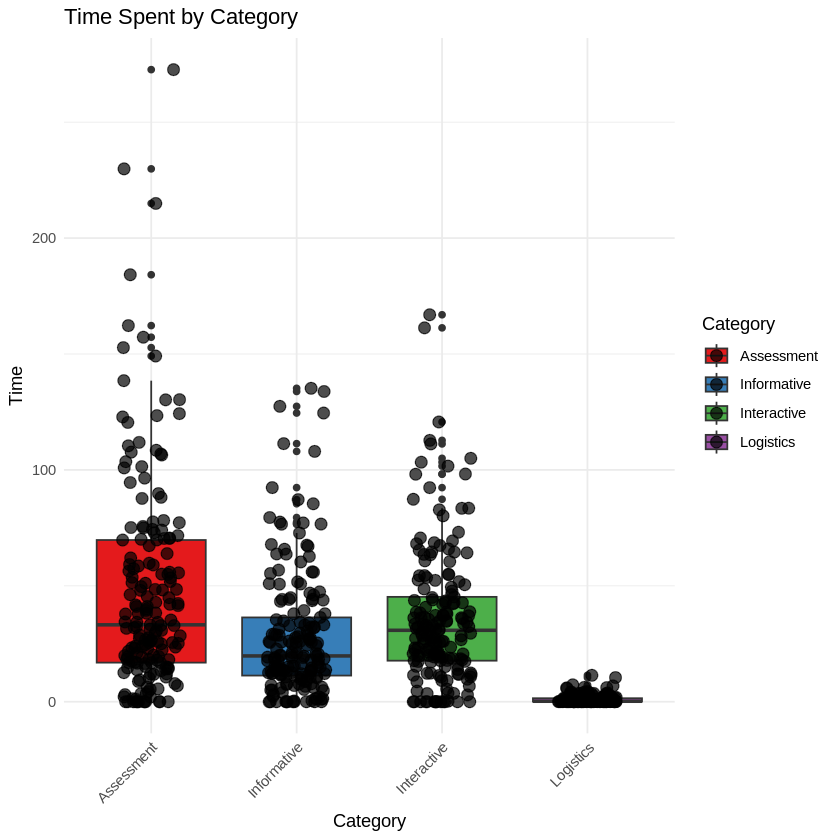

In [ ]:
time_categorized_long <- time_categorized_1iqr |>
  pivot_longer(
    cols = c(Informative, Assessment, Interactive, Logistics),
    names_to = "category",
    values_to = "time"
  )

ggplot(time_categorized_long, aes(x = category, y = time, fill = category)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.7, size = 3) +  # Add individual data points
  scale_fill_brewer(palette = "Set1") +
  labs(
    title = "Time Spent by Category",
    x = "Category",
    y = "Time",
    fill = "Category"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "right"
  )

nrow(time_categorized_1iqr)
nrow(time_categorized_2iqr)

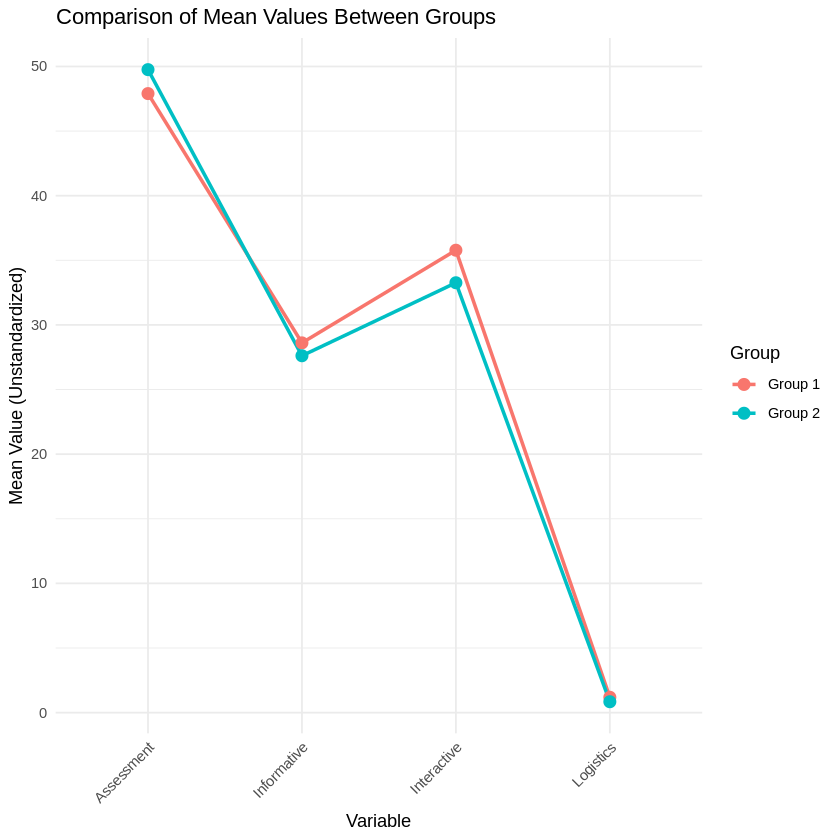

# A tibble: 2 × 5
  Informative Assessment Interactive Logistics Group  
        <dbl>      <dbl>       <dbl>     <dbl> <chr>  
1        28.6       47.9        35.8     1.19  Group 1
2        27.6       49.8        33.3     0.842 Group 2


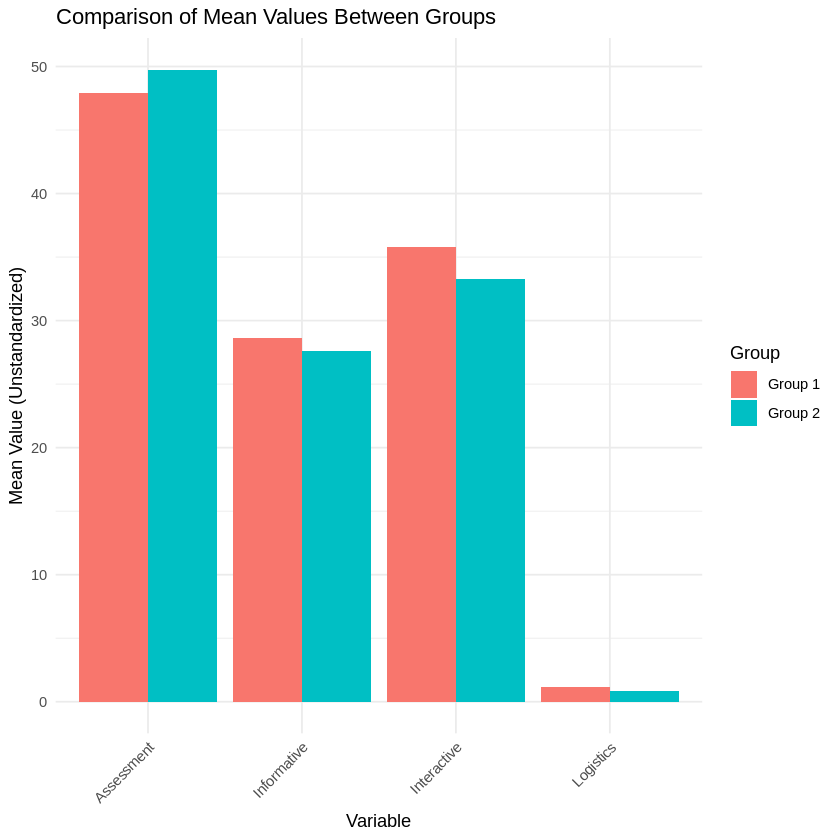

In [ ]:
# Calculate overall means for each group
overall_means_g1 <- time_categorized_1iqr |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean)) |>
    mutate(Group = "Group 1")

overall_means_g2 <- time_categorized_2iqr |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean)) |>
    mutate(Group = "Group 2")

# Combine the data
combined_means <- rbind(overall_means_g1, overall_means_g2)

# Convert to long format for plotting
combined_means_long <- combined_means |>
    pivot_longer(cols = c(Informative, Assessment, Interactive, Logistics),
               names_to = "Variable", values_to = "Value")

# Create a comparison plot
ggplot(combined_means_long, aes(x = Variable, y = Value, group = Group, color = Group)) +
    geom_line(size = 1) +
    geom_point(size = 3) +
    theme_minimal() +
    labs(title = "Comparison of Mean Values Between Groups",
        y = "Mean Value (Unstandardized)",
        x = "Variable") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# You can also create a bar chart for clearer comparison
ggplot(combined_means_long, aes(x = Variable, y = Value, fill = Group)) +
    geom_bar(stat = "identity", position = "dodge") +
    theme_minimal() +
    labs(title = "Comparison of Mean Values Between Groups",
        y = "Mean Value (Unstandardized)",
        x = "Variable") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print a table of the values
print(combined_means)

time_data_numeric1 <- time_categorized_1iqr |>
    select_if(is.numeric)

time_data_numeric2 <- time_categorized_2iqr |>
    select_if(is.numeric)

Warning message:
“
One or more analyses resulted in warnings! Examine these analyses carefully: model_1_class_4, model_1_class_6”


tidyLPA analysis using mclust: 

 Model Classes AIC     BIC     Entropy prob_min prob_max n_min n_max BLRT_p
 1     2       1904.70 1945.99 0.83    0.87     0.97     0.20  0.80  0.01  
 1     3       1866.92 1924.09 0.83    0.83     0.96     0.05  0.70  0.01  
 1     4       1876.91 1949.97 0.54    0.00     0.96     0.00  0.67  0.50  
 1     5       1744.93 1833.86 0.87    0.68     1.00     0.05  0.63  0.01  
 1     6       1754.93 1859.74 0.65    0.00     1.00     0.00  0.61  1.00  

tidyLPA analysis using mclust: 

 Model Classes AIC     BIC     Entropy prob_min prob_max n_min n_max BLRT_p
 1     2       1516.32 1554.84 0.88    0.91     0.98     0.20  0.80  0.01  
 1     3       1449.11 1502.44 0.92    0.84     0.99     0.10  0.75  0.01  
 1     4       1400.60 1468.74 0.95    0.83     0.99     0.04  0.76  0.01  
 1     5       1371.23 1454.19 0.87    0.83     0.99     0.06  0.51  0.01  
 1     6       1402.53 1500.30 0.83    0.78     1.00     0.01  0.45  1.00  

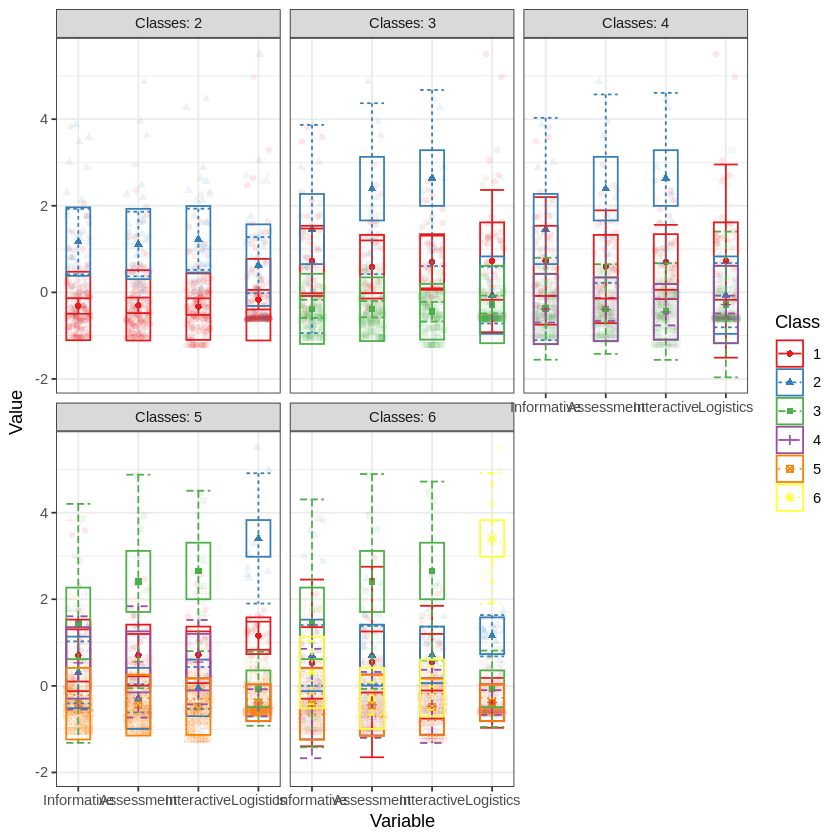

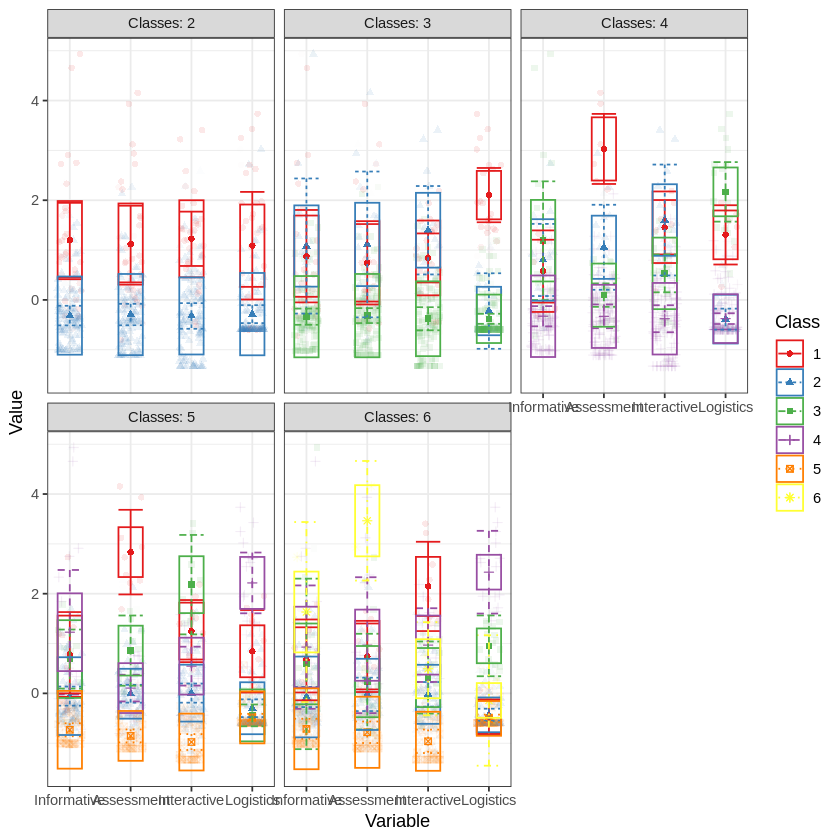

In [ ]:
vLPA_iqr1 <- time_data_numeric1 |>
    single_imputation() |>
    scale() |>
    estimate_profiles(2:6)

vLPA_iqr2 <- time_data_numeric2 |>
    single_imputation() |>
    scale() |>
    estimate_profiles(2:6)

vLPA_iqr1
vLPA_iqr2
plot_profiles(vLPA_iqr1)
plot_profiles(vLPA_iqr2)

# Group 1: the best class is class 5, || as it has the second lowest AIC and lowest BIC values with the best Entropy (define entropy). The BLRT p-value is also significant at 0.01 (has to be p < 0.05 to be significant)
# Group 2: the best class is class 5, || as it has the the second lowest AIC and BIC values with the second best Entropy and significant BLRT p-values

In [ ]:
get_fit(vLPA_iqr1)
get_fit(vLPA_iqr2)

Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-939.3477,1904.695,2050.619,1945.985,1958.985,1880.352,1920.695,1904.817,-1965.647,0.8281289,0.868010,0.9749249,0.20338983,0.7966102,126.510140260,0.00990099
1,3,-915.4587,1866.917,2069.591,1924.088,1942.088,1832.585,1887.917,1867.085,-1956.107,0.8336264,0.829970,0.9629107,0.04519774,0.7005650,47.778143247,0.00990099
1,4,-915.4569,1876.914,2136.927,1949.965,1972.965,1832.003,1902.914,1877.128,-2090.045,0.5446525,0.000000,0.9629322,0.00000000,0.6723164,0.003508989,0.50495050
1,5,-844.4630,1744.926,2061.057,1833.858,1861.858,1690.659,1775.926,1745.187,-1871.843,0.8666179,0.676247,0.9998878,0.04519774,0.6327684,141.987875753,0.00990099
1,6,-844.4655,1754.931,2128.252,1859.744,1892.744,1690.235,1790.931,1755.239,-2000.002,0.6522327,0.000000,0.9998876,0.00000000,0.6101695,-0.005080459,1.00000000


Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-745.1619,1516.324,1656.588,1554.841,1567.841,1492.093,1532.324,1513.707,-1565.495,0.8847538,0.9115352,0.9832738,0.20279720,0.7972028,128.92785,0.00990099
1,3,-706.5555,1449.111,1643.940,1502.442,1520.442,1414.944,1470.111,1445.487,-1513.111,0.9164733,0.8392638,0.9854377,0.10489510,0.7482517,77.21286,0.00990099
1,4,-677.2995,1400.599,1649.996,1468.744,1491.744,1356.493,1426.599,1395.969,-1477.467,0.9468326,0.8259060,0.9926348,0.04195804,0.7552448,58.51189,0.00990099
1,5,-657.6147,1371.229,1675.412,1454.189,1482.189,1316.966,1402.229,1365.592,-1482.102,0.8685193,0.8285446,0.9924367,0.05594406,0.5104895,39.36966,0.00990099
1,6,-668.2651,1402.530,1761.420,1500.304,1533.304,1338.188,1438.530,1395.887,-1545.785,0.8290702,0.7760602,0.9956719,0.01398601,0.4545455,-21.30088,1.00000000


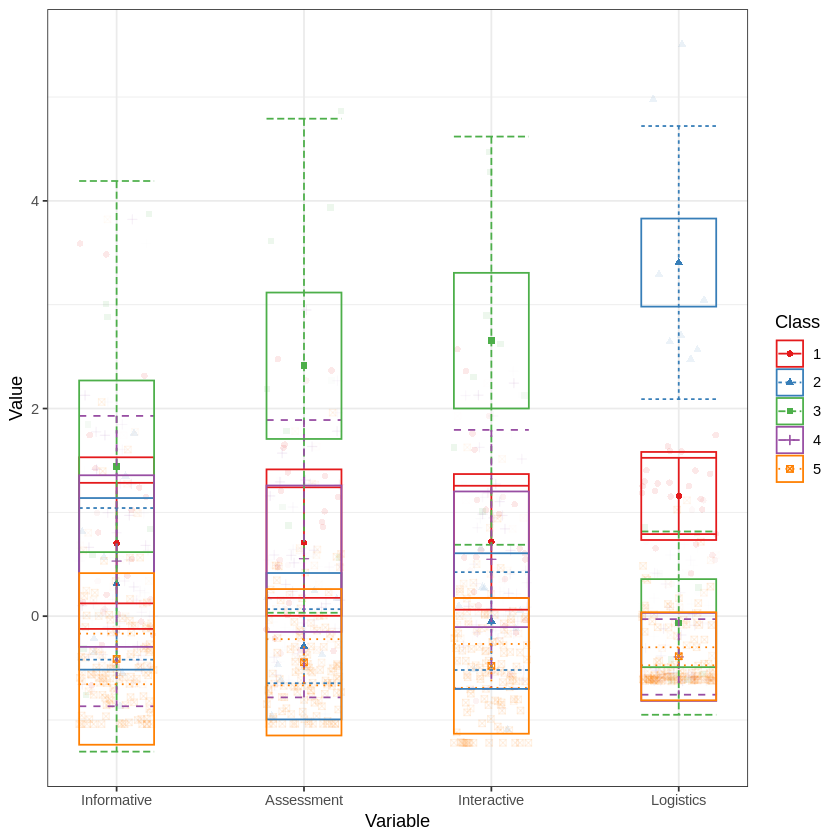

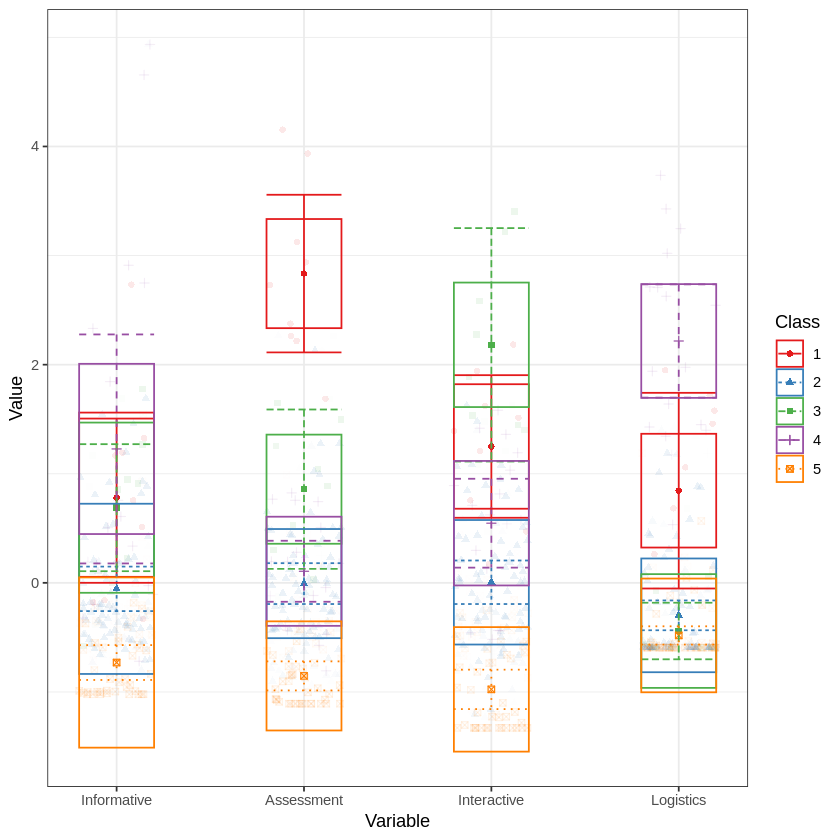

In [ ]:
lpa_plot1 <- time_data_numeric1 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(5)

lpa_plot2 <- time_data_numeric2 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(5)

#Group 1 - 5 class solution
plot_profiles(lpa_plot1)

#Group 2 - 5 class solution"
plot_profiles(lpa_plot2)

In [ ]:
library(tidyLPA)
library(dplyr)

# 1. Run separate LPAs for each group
group1_data <- time_data_numeric1
group2_data <- time_data_numeric2

group1_lpa <- group1_data |>
  select(Assessment, Informative, Interactive, Logistics) |>
  estimate_profiles(n_profiles = 5)

group2_lpa <- group2_data |>
  select(Assessment, Informative, Interactive, Logistics) |>
  estimate_profiles(n_profiles = 5)

# 2. Compare profile means and proportions
get_profile_info <- function(lpa_result) {
  profile_means <- get_estimates(lpa_result) |>
    filter(Category == "Means") |>
    select(Class, Parameter, Estimate)

  profile_counts <- get_data(lpa_result) |>
    count(Class) |>
    mutate(Proportion = n / sum(n))

  list(means = profile_means, proportions = profile_counts)
}

group1_info <- get_profile_info(group1_lpa)
group2_info <- get_profile_info(group2_lpa)

# 3. Calculate profile similarity index
calculate_psi <- function(means1, means2) {
  # Reshape for easier comparison
  means1_wide <- means1 |>
    pivot_wider(names_from = Parameter, values_from = Estimate) |>
    arrange(Class)

  means2_wide <- means2 |>
    pivot_wider(names_from = Parameter, values_from = Estimate) |>
    arrange(Class)

  # Calculate similarity measures for each profile pair
  similarity_matrix <- matrix(NA, nrow = max(means1_wide$Class),
                             ncol = max(means2_wide$Class))

  for(i in 1:nrow(means1_wide)) {
    for(j in 1:nrow(means2_wide)) {
      profile1 <- means1_wide[i, -1] |> as.numeric() #I find that sometimes this does not work so replace |> with %>% seems to do the trick
      profile2 <- means2_wide[j, -1] |> as.numeric()

      # Calculate correlation
      similarity_matrix[i, j] <- cor(profile1, profile2)
    }
  }

  return(similarity_matrix)
}

profile_similarity <- calculate_psi(group1_info$means, group2_info$means)
print("Profile similarity matrix (correlations):")
print(profile_similarity)

# 4. Proportion similarity
prop_similarity <- sum(abs(group1_info$proportions$Proportion -
                          group2_info$proportions$Proportion)) / 2
print(paste("Proportion dissimilarity index:", prop_similarity))

[1] "Profile similarity matrix (correlations):"
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.9026763 0.9982538 0.9412876 0.8620981 0.9923163
[2,] 0.5961186 0.8441383 0.8353964 0.9886701 0.9263643
[3,] 0.9209735 0.9906776 0.9625622 0.7614082 0.9603327
[4,] 0.8923024 0.9968119 0.9442031 0.8715131 0.9949113
[5,] 0.8561937 0.9897502 0.9658865 0.8773614 0.9963652
[1] "Proportion dissimilarity index: 0.476038086207578"


In [ ]:
# First, examine the profile means to determine engagement levels
print("Group 1 Profile Means:")
group1_means <- group1_info$means |>
  pivot_wider(names_from = Parameter, values_from = Estimate)
print(group1_means)

print("Group 2 Profile Means:")
group2_means <- group2_info$means |>
  pivot_wider(names_from = Parameter, values_from = Estimate)
print(group2_means)

# Find the best matching profiles based on the similarity matrix
best_matches <- apply(profile_similarity, 1, which.max)
print("Best matching profiles (Group 1 → Group 2):")
print(data.frame(Group1_Profile = 1:5,
                 Group2_Profile = best_matches,
                 Correlation = sapply(1:5, function(i) profile_similarity[i, best_matches[i]])))

# Assign engagement levels based on mean values
# For example, calculate overall mean of variables for each profile
group1_engagement <- group1_means |>
  mutate(MeanScore = rowMeans(select(., -Class))) |>
  arrange(desc(MeanScore)) |>
  mutate(EngagementLevel = case_when(
    row_number() <= ceiling(n()/3) ~ "High",
    row_number() <= ceiling(2*n()/3) ~ "Moderate",
    TRUE ~ "Low"
  ))

group2_engagement <- group2_means |>
  mutate(MeanScore = rowMeans(select(., -Class))) |>
  arrange(desc(MeanScore)) |>
  mutate(EngagementLevel = case_when(
    row_number() <= ceiling(n()/3) ~ "High",
    row_number() <= ceiling(2*n()/3) ~ "Moderate",
    TRUE ~ "Low"
  ))

print("Group 1 Engagement Levels:")
print(group1_engagement |> select(Class, MeanScore, EngagementLevel))

print("Group 2 Engagement Levels:")
print(group2_engagement |> select(Class, MeanScore, EngagementLevel))

# Profiles 1 and 2 in Group 1 have very high correlations (>0.98) with Profile 1 in Group 2
# Profiles 3 and 5 in Group 1 have very high correlations (>0.99) with Profiles 3 and 5 in Group 2
# Profile 4 in Group 1 correlates less strongly with profiles in Group 2

[1] "Group 1 Profile Means:"
# A tibble: 5 × 5
  Class Assessment Informative Interactive Logistics
  <int>      <dbl>       <dbl>       <dbl>     <dbl>
1     1       80.8        48.0        56.8     3.34 
2     2       34.5        37.2        34.4     7.50 
3     3      159.         68.4       113.      1.05 
4     4       71.1        42.5        50.4     0.470
5     5       26.9        16.8        21.4     0.470
[1] "Group 2 Profile Means:"
# A tibble: 5 × 5
  Class Assessment Informative Interactive Logistics
  <int>      <dbl>       <dbl>       <dbl>     <dbl>
1     1      177.        48.8        64.6      2.04 
2     2       49.4       26.1        33.4      0.419
3     3       88.3       46.2        87.8      0.216
4     4       54.5       60.8        47.0      3.99 
5     5       11.4        7.82        8.80     0.158
[1] "Best matching profiles (Group 1 → Group 2):"
  Group1_Profile Group2_Profile Correlation
1              1              2   0.9982538
2              2          

######IDK if i want this

In [ ]:
library(cluster)

class_data1 <- get_data(vLPA_iqr1) |>
    filter(classes_number == 5, Class_prob == 5) |>
    group_by(Class) |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean))

class_data2 <- get_data(vLPA_iqr2) |>
    filter(classes_number == 5, Class_prob == 5) |>
    group_by(Class) |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean))

calculate_quadrant_scores <- function(data) {
    result <- data |>
    rowwise() |>
    mutate(StrongPositive = sum(c_across(Informative:Logistics) >= 0.5),
          ModeratePositive = sum(c_across(Informative:Logistics) >= 0 & c_across(Informative:Logistics) < 0.5),
          ModerateNegative = sum(c_across(Informative:Logistics) < 0 & c_across(Informative:Logistics) >= -0.5),
          StrongNegative = sum(c_across(Informative:Logistics) < -0.5)) |>
    mutate(QuadrantScore = StrongPositive*2 + ModeratePositive - ModerateNegative - StrongNegative*2) |>
    ungroup()

  return(result)
}

quadrant_scores1 <- calculate_quadrant_scores(class_data1)
quadrant_scores2 <- calculate_quadrant_scores(class_data2)

print("Quadrant analysis Group 1 relative to zero:")
print(quadrant_scores1 |>
    dplyr::select(Class, StrongPositive, ModeratePositive, ModerateNegative, StrongNegative, QuadrantScore))
print("---------------------------------------------------------------------------------")
print("Quadrant analysis Group 2 relative to zero:")
print(quadrant_scores2 |>
    dplyr::select(Class, StrongPositive, ModeratePositive, ModerateNegative, StrongNegative, QuadrantScore))
print("---------------------------------------------------------------------------------")

# Final engagement groupings based on quadrant score
quadrant_scores1 <- quadrant_scores1 |>
    arrange(desc(QuadrantScore))

quadrant_scores2 <- quadrant_scores2 |>
    arrange(desc(QuadrantScore))

# Assign engagement levels based on quadrant scores
n_classes1 <- nrow(quadrant_scores1)
high_threshold1 <- ceiling(n_classes/3)
moderate_threshold1 <- ceiling(2*n_classes/3)

n_classes2 <- nrow(quadrant_scores2)
high_threshold2 <- ceiling(n_classes/3)
moderate_threshold2 <- ceiling(2*n_classes/3)

quadrant_scores1 <- quadrant_scores1 |>
    mutate(QuadrantEngagement = case_when(
          row_number() <= high_threshold ~ "High",
          row_number() <= moderate_threshold ~ "Moderate",
          TRUE ~ "Low"))

quadrant_scores2 <- quadrant_scores2 |>
    mutate(QuadrantEngagement = case_when(
          row_number() <= high_threshold ~ "High",
          row_number() <= moderate_threshold ~ "Moderate",
          TRUE ~ "Low"))

print("Quadrant analysis Group 1 Classifications:")
print(quadrant_scores1 |>
    dplyr::select(Class, QuadrantScore, QuadrantEngagement))
print("---------------------------------------------------------------------------------")
print("Quadrant analysis Group 2 Classifications:")
print(quadrant_scores2 |>
    dplyr::select(Class, QuadrantScore, QuadrantEngagement))

[1] "Quadrant analysis Group 1 relative to zero:"
# A tibble: 5 × 6
  Class StrongPositive ModeratePositive ModerateNegative StrongNegative
  <dbl>          <int>            <int>            <int>          <int>
1     1              0                3                1              0
2     2              4                0                0              0
3     3              3                0                0              1
4     4              1                2                1              0
5     5              0                0                1              3
# ℹ 1 more variable: QuadrantScore <dbl>
[1] "---------------------------------------------------------------------------------"
[1] "Quadrant analysis Group 2 relative to zero:"
# A tibble: 5 × 6
  Class StrongPositive ModeratePositive ModerateNegative StrongNegative
  <dbl>          <int>            <int>            <int>          <int>
1     1              4                0                0              0
2     2        

In [ ]:
#simple means approach
means1 <- get_data(vLPA_iqr1) |>
    filter(classes_number == 5, Class_prob == 5) |>
    group_by(Class) |>
    summarize(across(c(Informative, Assessment, Interactive), mean)) |>
    mutate(mean2 = (Informative + Assessment + Interactive + Logistics)/4)

means1

means2 <- get_data(vLPA_iqr2) |>
    filter(classes_number == 5, Class_prob == 5) |>
    group_by(Class) |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean)) |>
    mutate(mean2 = (Informative + Assessment + Interactive + Logistics)/4)

means2

Class,Informative,Assessment,Interactive,Logistics,mean2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.07819829,0.2402657,0.0790410,-0.1855711,0.05298346
2,0.51263108,0.9358419,0.5156133,2.3657805,1.08246669
3,2.05676654,0.7110134,0.7751018,-0.5863312,0.73913763
4,-0.12000298,0.3351202,2.4044811,0.4900967,0.77742376
5,-0.80956808,-0.8013224,-0.8297181,-0.4742955,-0.72872602


Class,Informative,Assessment,Interactive,Logistics,mean2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.28626691,2.192671974,1.6081453,0.90524023,1.49808111
2,-0.44624846,1.945849842,0.0668673,-0.38115705,0.29632791
3,0.04210721,0.008297777,0.2510138,0.04880995,0.08755718
4,2.98751263,0.193683311,0.3280156,0.86323548,1.09311176
5,-0.86223941,-0.990010863,-1.0563158,-0.44091865,-0.83737118


######Continue here

In [ ]:
group_engage_class_g1 <- get_data(vLPA_iqr1) |>
    filter(classes_number == 5, Class_prob == 5) |>
    mutate(Engage_Class = case_when(
              Class %in% c(3,1) ~ "High",
              Class %in% c(2,4) ~ "Moderate",
              Class == 5 ~ "Low"),
          Group = "Group 1")

group_engage_class_g2 <- get_data(vLPA_iqr2) |>
    filter(classes_number == 5, Class_prob == 5) |>
    mutate(Engage_Class = case_when(
              Class %in% c(3,1) ~ "High",
              Class %in% c(2,4) ~ "Moderate",
              Class == 5 ~ "Low"),
          Group = "Group 2")

head(group_engage_class_g1)
head(group_engage_class_g2)

model_number,classes_number,Informative,Assessment,Interactive,Logistics,Class,Class_prob,Probability,id,Engage_Class,Group
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>
1,5,-0.65256516,-0.7652485,-0.007783909,-0.6153995,5,5,0.9827107,1,Low,Group 1
1,5,-0.49657273,-0.7092395,-0.166155595,0.7170576,5,5,0.9111415,2,Low,Group 1
1,5,1.60490061,-0.4463368,-0.169441654,-0.6243868,5,5,0.6625496,3,Low,Group 1
1,5,-0.77977185,-0.6722869,-0.635516641,0.2844090,5,5,0.9958216,4,Low,Group 1
1,5,-0.06817809,0.2052777,0.214628433,-0.6046148,5,5,0.6816956,5,Low,Group 1
1,5,-0.62914609,-0.6414335,-0.428910789,-0.5861009,5,5,0.9916065,6,Low,Group 1


model_number,classes_number,Informative,Assessment,Interactive,Logistics,Class,Class_prob,Probability,id,Engage_Class,Group
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>
1,5,0.9295995,-0.35706190,-0.4450698,-0.5936726,2,5,0.09171217,1,Moderate,Group 2
1,5,-0.4773275,-0.55686453,-0.3145299,-0.1763529,2,5,0.32459776,2,Moderate,Group 2
1,5,-0.3657782,-0.37619779,-0.3996889,-0.5936726,2,5,0.28367516,3,Moderate,Group 2
1,5,-0.4306388,-0.24088524,-0.2785201,-0.5936726,2,5,0.15756597,4,Moderate,Group 2
1,5,-0.3250728,-0.61269337,-0.1575510,-0.5936726,2,5,0.28820976,5,Moderate,Group 2
1,5,-0.3686335,0.04994428,-0.6678621,-0.1815224,2,5,0.13806495,6,Moderate,Group 2


In [ ]:
rbind(group_engage_class_g1,group_engage_class_g2) |>
    group_by(Engage_Class, Group) |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), list(mean = mean, sd = sd)))

`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.


Engage_Class,Group,Informative_mean,Informative_sd,Assessment_mean,Assessment_sd,Interactive_mean,Interactive_sd,Logistics_mean,Logistics_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,0.8802765,1.3045944,1.0984214,1.3124339,1.1915247,1.2602570,0.8231077,0.6988357
High,Group 2,0.7312102,0.8494505,1.9186740,1.2067440,1.7070123,0.8646601,0.2341800,0.9643445
Low,Group 1,-0.4252500,0.5434846,-0.4512174,0.5046368,-0.4803909,0.4888028,-0.3946249,0.3328626
Low,Group 2,-0.8024357,0.2518143,-0.9385455,0.1844716,-1.0579852,0.3115627,-0.4716410,0.2665521
Moderate,Group 1,0.5805899,1.0181991,0.4465137,0.8727994,0.4526084,0.7911146,0.5323573,1.7889024
Moderate,Group 2,0.1828568,1.0219853,0.0130020,0.5105685,0.1007584,0.6350660,0.1444224,1.1308561


In [ ]:
# Add row numbers as IDs to the clean original dataset
time_categorized_1iqr <- time_categorized_1iqr |>
    mutate(id = row_number(), Group = "Group 1")

time_categorized_2iqr <- time_categorized_2iqr |>
    mutate(id = row_number(), Group = "Group 2")

# Group 1
class_mapping_1 <-  group_engage_class_g1 |>
    dplyr::select(Engage_Class, id)

# Group 2
class_mapping_2 <-  group_engage_class_g2 |>
    dplyr::select(Engage_Class, id)

#Join Class allocation with original data set
original_iqr_with_class1 <- time_categorized_1iqr |>
    left_join(class_mapping_1, by = "id")

original_iqr_with_class2 <- time_categorized_2iqr |>
    left_join(class_mapping_2, by = "id")

#Summarizes means of the different page types according the class/profile
class_means_1 <- original_iqr_with_class1 |>
    group_by(Engage_Class, Group) |> #produces warning but it's not an issue, i wanted to group by class but it would remove the group in later steps
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean))

class_means_2 <- original_iqr_with_class2 |>
    group_by(Engage_Class, Group) |>
    summarize(across(c(Informative, Assessment, Interactive, Logistics), mean))

class_means_1
class_means_2

`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.


Engage_Class,Group,Informative,Assessment,Interactive,Logistics
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,52.84626,98.66016,70.73498,2.7136667
Low,Group 1,16.90383,27.04977,21.68758,0.4554196
Moderate,Group 1,44.59559,68.53484,49.05809,2.1744792


Engage_Class,Group,Informative,Assessment,Interactive,Logistics
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 2,47.396743,135.944172,75.978682,1.1743725
Low,Group 2,5.905215,7.593188,6.788053,0.1731111
Moderate,Group 2,32.561492,50.338262,35.784173,1.0470444


Engage_Class,Group,Informative,Assessment,Interactive,Logistics
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,52.846261,98.660159,70.734979,2.7136667
Low,Group 1,16.903835,27.049774,21.687576,0.4554196
Moderate,Group 1,44.595594,68.534839,49.058094,2.1744792
High,Group 2,47.396743,135.944172,75.978682,1.1743725
Low,Group 2,5.905215,7.593188,6.788053,0.1731111
Moderate,Group 2,32.561492,50.338262,35.784173,1.0470444


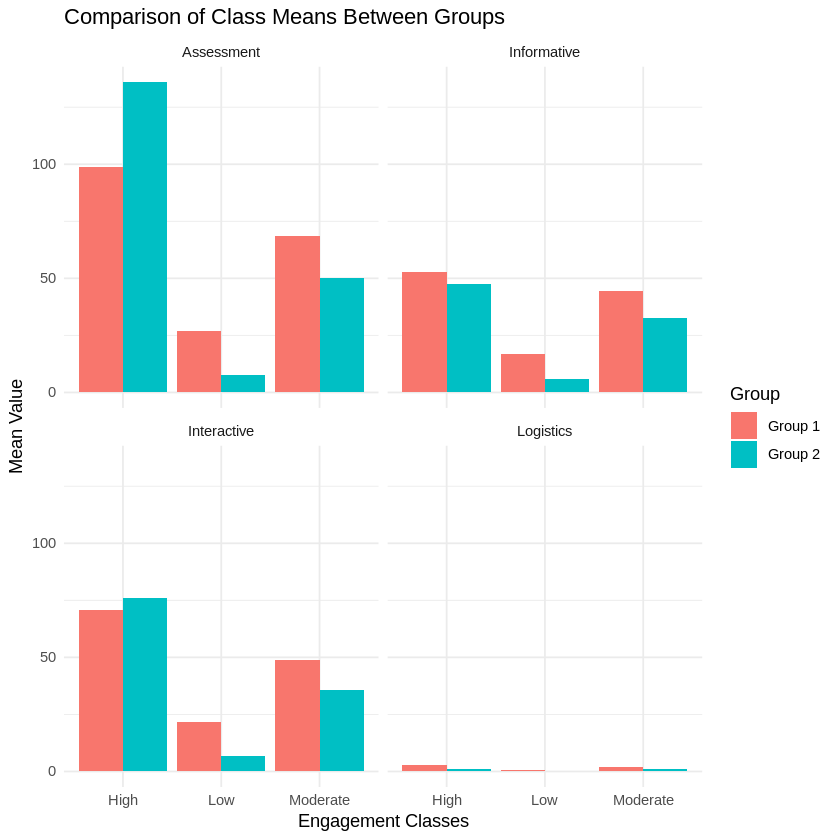

In [ ]:
# Combine the class means from both groups
all_class_means <- rbind(class_means_1, class_means_2)

# Pivot to long format for plotting
class_means_long <- all_class_means |>
    pivot_longer(cols = c(Informative, Assessment, Interactive, Logistics),
                names_to = "Category", values_to = "Value")

# Create a bar chart comparison faceted by variable
ggplot(class_means_long, aes(x = factor(Engage_Class), y = Value, fill = Group)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~Category) +
    theme_minimal() +
    labs(title = "Comparison of Class Means Between Groups",
        y = "Mean Value",
        x = "Engagement Classes")

all_class_means

In [ ]:
# Add engagement classification to original datasets
group1_with_engagement <- dplyr::left_join(get_data(group1_lpa),
  group1_engagement |> select(Class, EngagementLevel),
  by = "Class"  # Now using Class as the joining column
)

group2_with_engagement <- dplyr::left_join(
  get_data(group2_lpa),
  group2_engagement |> select(Class, EngagementLevel),
  by = "Class"  # Now using Class as the joining column
)

# Combine both groups into one dataset with engagement levels
combined_data <- bind_rows(group1_with_engagement |> mutate(Group = "Group1"),
                            group2_with_engagement |> mutate(Group = "Group2"))

head(combined_data)

model_number,classes_number,Assessment,Informative,Interactive,Logistics,CPROB1,CPROB2,CPROB3,CPROB4,CPROB5,Class,EngagementLevel,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,5,12.53808,10.64563,35.5520,0.04600000,9.108575e-07,1.697235e-21,2.551635e-11,0.024877728,0.9751214,5,Low,Group1
1,5,15.12631,14.94025,30.9060,2.51700000,7.333539e-02,2.404157e-09,1.584235e-10,0.022221146,0.9044435,5,Low,Group1
1,5,27.27531,72.79588,30.8096,0.02933333,2.998101e-05,9.417298e-21,1.484403e-08,0.417121175,0.5828488,5,Low,Group1
1,5,16.83392,7.14350,17.1368,1.71466667,3.496838e-04,1.333374e-13,1.439596e-12,0.005964077,0.9936862,5,Low,Group1
1,5,57.38708,26.73437,42.0767,0.06600000,3.131234e-05,4.525690e-21,1.105147e-07,0.376561888,0.6234067,5,Low,Group1
1,5,18.25969,11.29037,23.1978,0.10033333,4.961176e-07,2.186845e-21,2.622482e-12,0.012410727,0.9875888,5,Low,Group1


#### Statistical Testing

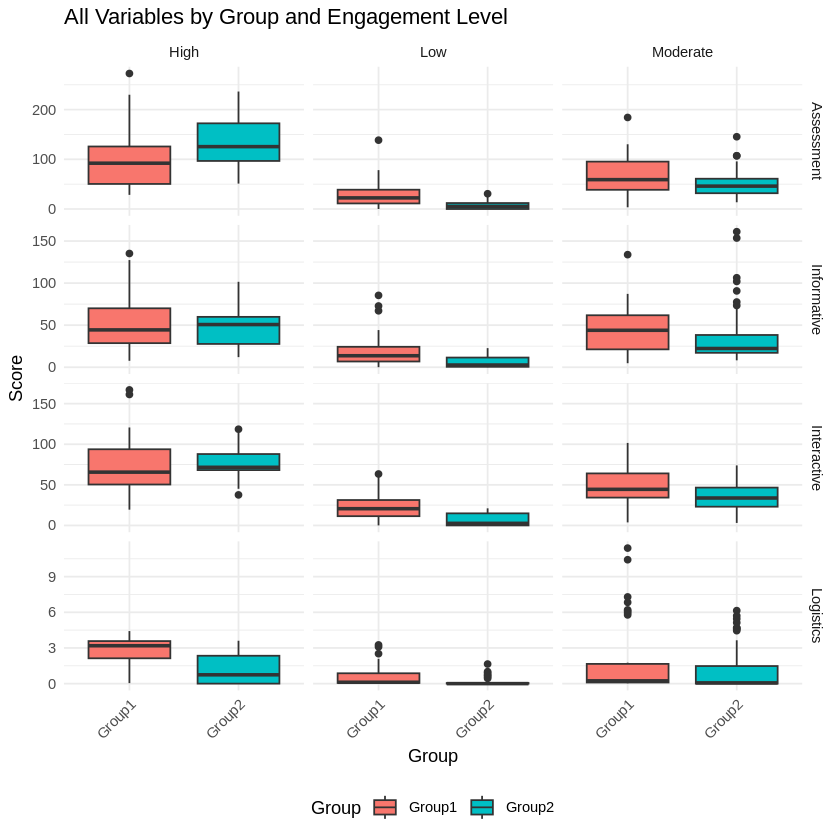

In [ ]:
library(ggplot2)
library(dplyr)


#box plot for all variables to compare patterns
long_data <- combined_data |>
  tidyr::pivot_longer(cols = c(Assessment, Informative, Interactive, Logistics),
                      names_to = "Variable", values_to = "Value")

all_vars_plot <- ggplot(long_data, aes(x = Group, y = Value, fill = Group)) +
  geom_boxplot() +
  facet_grid(Variable ~ EngagementLevel, scales = "free_y") +
  theme_minimal() +
  labs(title = "All Variables by Group and Engagement Level",
       y = "Score") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plots
print(all_vars_plot)

##### Mann-Whitney U Test

In [ ]:
# Could not run the t test due to the heavily skewed distribution, non-parametric test for ordinal data is
# Create a function to run Mann-Whitney U test by profile
mw_test_by_profile <- function(var_name, profile_category, data) {
    # Filter data for the specific profile
    profile_data <- data |> filter(EngagementLevel == profile_category)

    # Get actual sample sizes
    n_group1 <- sum(profile_data$Group == "Group1")
    n_group2 <- sum(profile_data$Group == "Group2")

    # If either group has no data, return NA
    if (n_group1 == 0 || n_group2 == 0) {
        return(list(
            Variable = var_name,
            Profile = profile_category,
            W = NA,
            p_value = NA,
            effect_size = NA,
            n_group1 = n_group1,
            n_group2 = n_group2,
            interpretation = "Insufficient data"
        ))
    }

    # Run the test
    formula <- as.formula(paste(var_name, "~ Group"))
    test_result <- tryCatch({
        wilcox.test(formula, data = profile_data, exact = FALSE, correct = TRUE)
    }, error = function(e) {
        return(NULL)
    })

    # If test failed, return NA
    if (is.null(test_result)) {
        return(list(
            Variable = var_name,
            Profile = profile_category,
            W = NA,
            p_value = NA,
            effect_size = NA,
            n_group1 = n_group1,
            n_group2 = n_group2,
            interpretation = "Test failed"
        ))
    }

    # Calculate effect size using r = Z/sqrt(N)
    # First get Z from the p-value
    z <- qnorm(test_result$p.value/2)

    # Then calculate effect size r
    r <- abs(z) / sqrt(n_group1 + n_group2)

    # Return results
    return(list(
        Variable = var_name,
        Profile = profile_category,
        W = test_result$statistic,
        p_value = test_result$p.value,
        effect_size = r,
        n_group1 = n_group1,
        n_group2 = n_group2,
        interpretation = case_when(
            r < 0.1 ~ "Negligible effect",
            r < 0.3 ~ "Small effect",
            r < 0.5 ~ "Medium effect",
            TRUE ~ "Large effect"
        )
    ))
}

# Define variables and profiles
variables <- c("Informative", "Assessment", "Interactive", "Logistics")
profiles <- c("High", "Moderate", "Low")

# Run tests for all combinations
results_list <- list()
for (var in variables) {
    for (prof in profiles) {
        results_list[[length(results_list) + 1]] <- mw_test_by_profile(var, prof, combined_data)
    }
}

# Convert to data frame
profile_results <- do.call(rbind, lapply(results_list, function(x) data.frame(x)))

# Print results in a nicely formatted table
profile_results |>
    arrange(Profile, Variable) |>
    knitr::kable(digits = 3)



|    |Variable    |Profile  |      W| p_value| effect_size| n_group1| n_group2|interpretation    |
|:---|:-----------|:--------|------:|-------:|-----------:|--------:|--------:|:-----------------|
|W3  |Assessment  |High     |  165.0|   0.025|       0.320|       32|       17|Medium effect     |
|W   |Informative |High     |  283.0|   0.825|       0.032|       32|       17|Negligible effect |
|W6  |Interactive |High     |  225.0|   0.329|       0.140|       32|       17|Small effect      |
|W9  |Logistics   |High     |  440.0|   0.000|       0.503|       32|       17|Large effect      |
|W5  |Assessment  |Low      | 3160.0|   0.000|       0.432|      111|       36|Medium effect     |
|W2  |Informative |Low      | 2997.5|   0.000|       0.371|      111|       36|Medium effect     |
|W8  |Interactive |Low      | 3209.0|   0.000|       0.451|      111|       36|Medium effect     |
|W11 |Logistics   |Low      | 3300.5|   0.000|       0.485|      111|       36|Medium effect     |
|W4  |As

**High engagement profile:**



*   Assessment is statistically significant and has a medium effect size
      * Group two is higher
*   Logistics shows a large effect size and is very stat sig
       * Group one is higher
*   Informative is negligible
*   Interactive has small but insignificant effect size

**Moderate engagement profile:**

* Small effect size for all scores and statistically significant
* Assessment, informative and logistics show statistically significant difference
    * group 1 shows higher scores in these factors

**Low engagement profile:**

* everything is very statistically significant, medium effect size

##### Chi-Square test

In [ ]:
# Create a contingency table of Group vs. EngagementLevel
engagement_table <- table(combined_data$Group, combined_data$EngagementLevel)

# View the table
print(engagement_table)

# Calculate percentages within each group
prop_table <- prop.table(engagement_table, margin = 1) * 100
print(round(prop_table, 2)) # Rounded to 2 decimal places

# Perform chi-square test
chi_test <- chisq.test(engagement_table)
print(chi_test)

# Check if expected cell counts are adequate
print(chi_test$expected)

        
         High Low Moderate
  Group1   32 111       34
  Group2   17  36       90
        
          High   Low Moderate
  Group1 18.08 62.71    19.21
  Group2 11.89 25.17    62.94

	Pearson's Chi-squared test

data:  engagement_table
X-squared = 65.272, df = 2, p-value = 6.705e-15

        
             High      Low Moderate
  Group1 27.10312 81.30938  68.5875
  Group2 21.89688 65.69062  55.4125


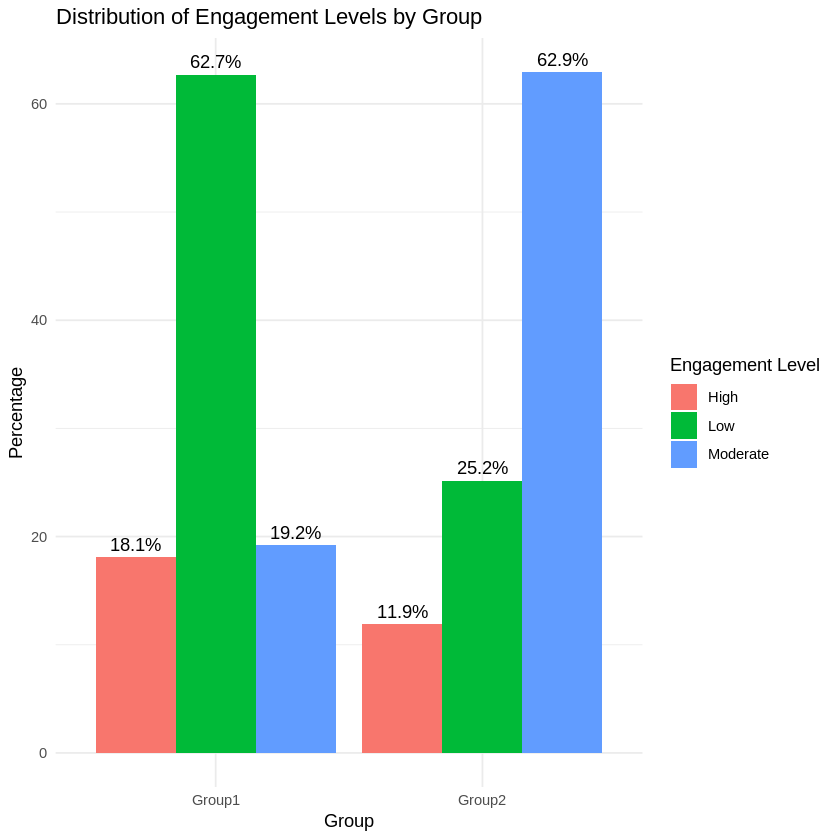

In [ ]:
library(ggplot2)

# Create a summary dataframe for plotting
engagement_summary <- combined_data |>
  group_by(Group, EngagementLevel) |>
  summarise(Count = n(), .groups = "drop") |>
  group_by(Group) |>
  mutate(Percentage = Count / sum(Count) * 100)

# Plot the distribution
ggplot(engagement_summary, aes(x = Group, y = Percentage, fill = EngagementLevel)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = sprintf("%.1f%%", Percentage)),
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Distribution of Engagement Levels by Group",
       y = "Percentage",
       fill = "Engagement Level") +
  theme_minimal()

In [ ]:
# Post-hoc analysis with adjusted residuals
# Residuals > 1.96 or < -1.96 indicate significant deviations
residuals <- chi_test$residuals
print("Standardized residuals:")
print(residuals)

# Or conduct separate proportion tests for each engagement level
for (level in unique(combined_data$EngagementLevel)) {
  level_data <- combined_data |>
    mutate(is_level = EngagementLevel == level)

  prop_test <- prop.test(
    x = table(level_data$Group, level_data$is_level)[, "TRUE"],
    n = table(level_data$Group)
  )

  cat("\nProportion test for", level, "engagement:\n")
  print(prop_test)
}

[1] "Standardized residuals:"
        
               High        Low   Moderate
  Group1  0.9406094  3.2926762 -4.1763481
  Group2 -1.0464728 -3.6632591  4.6463861

Proportion test for Low engagement:

	2-sample test for equality of proportions with continuity correction

data:  table(level_data$Group, level_data$is_level)[, "TRUE"] out of table(level_data$Group)
X-squared = 43.377, df = 1, p-value = 4.514e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.2683745 0.4823663
sample estimates:
   prop 1    prop 2 
0.6271186 0.2517483 


Proportion test for Moderate engagement:

	2-sample test for equality of proportions with continuity correction

data:  table(level_data$Group, level_data$is_level)[, "TRUE"] out of table(level_data$Group)
X-squared = 61.895, df = 1, p-value = 3.623e-15
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.5417565 -0.3328040
sample estimates:
   prop 1    prop 2 
0.1920904 0.6293706 


Proportion test for High engage

**low profile**

Highly significant p-value (p < 0.001)

Group1 has 62.7% in low engagement

Group2 has 25.2% in low engagement

This 37.5 percentage point difference is statistically significant

---

**moderate profile**

Highly significant p-value (p < 0.001)

Group1 has 19.2% in moderate engagement

Group2 has 62.9% in moderate engagement

This 43.7 percentage point difference is statistically significant

---

**high profile**

Non-significant p-value (p = 0.1698)

Group1 has 18.1% in high engagement

Group2 has 11.9% in high engagement

This 6.2 percentage point difference is not statistically significant


##Text Score

In [ ]:
# Timestamp ranges:
# Group 1: 2022-11-03 07:11:43.686000+00:00 to 2023-09-28 19:58:25.536000+00:00
# Group 2: 2023-09-28 22:52:17.939000+00:00 to 2024-10-31 19:22:45.922000+00:00

#Score per person

score_stats_1 <- read_csv("group1_scores.csv")
score_stats_2 <- read_csv("group2_scores.csv")



ERROR: Error in read_csv("group1_scores.csv"): could not find function "read_csv"


In [ ]:
score_categories1 <- score_stats_1  |>
    select(person_name, sentiment_score, complexity_score, length_score, word_count)
score_categories2 <- score_stats_2  |>
    select(person_name, sentiment_score, complexity_score, length_score, word_count)

nrow(score_categories1)

[1] 222

In [ ]:
# removing outliers with IQR (better than using z score because of the skewed nature of the distribution)

# identify outliers
is_outlier <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 3 * iqr

  print("upper")
  print(q3 + 3 * iqr)

  return(x < lower_bound | x > upper_bound)
}

head(arrange(score_categories1, desc(sentiment_score)))

# Apply to all numeric columns
score_categories1iqr <- score_categories1 |>
  filter(
    !is_outlier(sentiment_score) &
    !is_outlier(complexity_score) &
    !is_outlier(length_score) &
    !is_outlier(word_count)
  )

  # Apply to all numeric columns
score_categories2iqr <- score_categories2 |>
  filter(
    !is_outlier(sentiment_score) &
    !is_outlier(complexity_score) &
    !is_outlier(length_score) &
    !is_outlier(word_count)
  )

head(score_categories1iqr)
head(score_categories2iqr)

person_name,sentiment_score,complexity_score,length_score,word_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 14,4.643077,3.938077,0.22692308,2.2692308
Person 210,4.615385,1.546154,0.09230769,0.9230769
Person 60,4.615385,2.219231,0.16153846,1.6153846
Person 127,4.510769,3.074231,0.73846154,7.3846154
Person 84,4.508077,3.459615,0.44615385,4.4615385
Person 34,4.502692,3.381538,0.67307692,6.7307692


[1] "upper"
     75% 
13.81058 
[1] "upper"
     75% 
8.509615 
[1] "upper"
      75% 
0.8538462 
[1] "upper"
     75% 
6.423077 
[1] "upper"
     75% 
14.61538 
[1] "upper"
     75% 
9.631923 
[1] "upper"
75% 
  1 
[1] "upper"
75% 
  8 


person_name,sentiment_score,complexity_score,length_score,word_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 1,4.338077,3.213846,0.6115385,6.11538462
Person 10,0.000000,0.000000,0.0000000,0.66666667
Person 100,3.461538,2.046923,0.1461538,1.69230769
Person 101,4.354615,3.298462,0.5653846,5.65384615
Person 102,0.000000,0.000000,0.0000000,0.03846154
Person 103,4.419231,3.015385,0.1961538,1.96153846


person_name,sentiment_score,complexity_score,length_score,word_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Person 223,1.345385,0.5653846,0.05384615,0.5384615
Person 224,0.000000,0.0000000,0.00000000,0.9230769
Person 225,0.000000,0.0000000,0.00000000,0.9230769
Person 226,4.051538,2.2273077,0.31923077,3.2692308
Person 227,3.660000,3.0615385,0.62307692,6.2307692
Person 228,4.230769,1.7730769,0.08461538,0.9230769


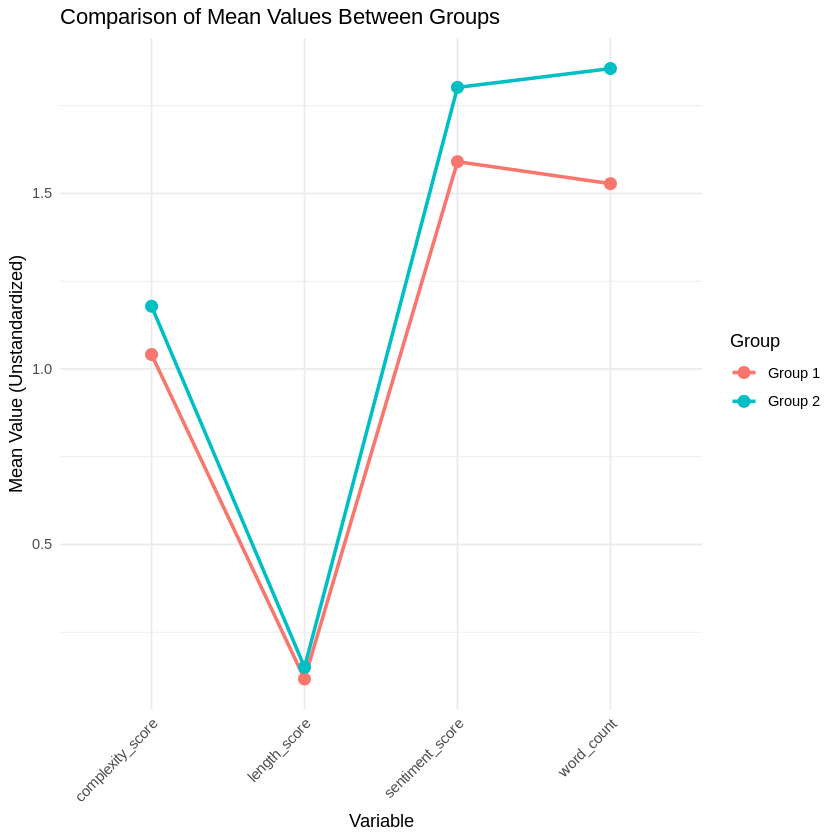

# A tibble: 2 × 5
  sentiment_score complexity_score length_score word_count Group  
            <dbl>            <dbl>        <dbl>      <dbl> <chr>  
1            1.59             1.04        0.117       1.53 Group 1
2            1.80             1.18        0.150       1.86 Group 2


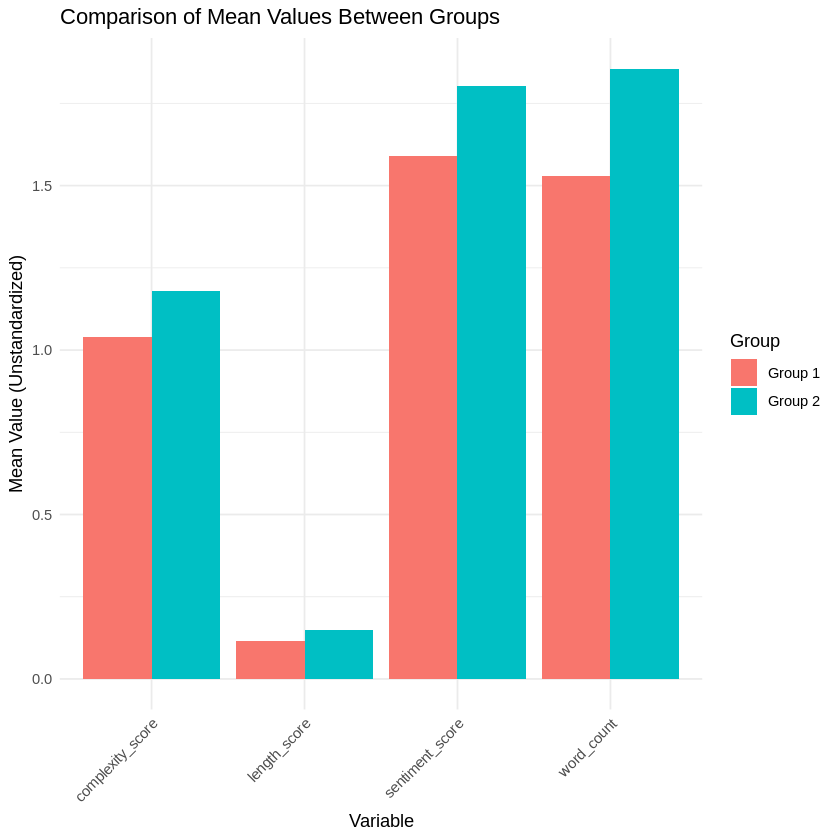

In [ ]:
# Calculate overall means for each group
overall_means_g1 <- score_categories1iqr |>
  summarize(across(c(sentiment_score, complexity_score, length_score, word_count), mean)) |>
  mutate(Group = "Group 1")

overall_means_g2 <- score_categories2iqr |>
  summarize(across(c(sentiment_score, complexity_score, length_score, word_count), mean)) |>
  mutate(Group = "Group 2")

# Combine the data
combined_means <- rbind(overall_means_g1, overall_means_g2)

# Convert to long format for plotting
combined_means_long <- combined_means |>
  pivot_longer(cols = c(sentiment_score, complexity_score, length_score, word_count),
               names_to = "Variable", values_to = "Value")

# Create a comparison plot
ggplot(combined_means_long, aes(x = Variable, y = Value, group = Group, color = Group)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "Comparison of Mean Values Between Groups",
       y = "Mean Value (Unstandardized)",
       x = "Variable") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# You can also create a bar chart for clearer comparison
ggplot(combined_means_long, aes(x = Variable, y = Value, fill = Group)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Comparison of Mean Values Between Groups",
       y = "Mean Value (Unstandardized)",
       x = "Variable") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print a table of the values
print(combined_means)

score_data_numeric1 <- score_categories1iqr |>
    select_if(is.numeric)

score_data_numeric2 <- score_categories2iqr |>
    select_if(is.numeric)

Warning message:
“
One or more analyses resulted in warnings! Examine these analyses carefully: model_1_class_4, model_1_class_5”


tidyLPA analysis using mclust: 

 Model Classes AIC     BIC     Entropy prob_min prob_max n_min n_max BLRT_p
 1     2       1637.99 1681.44 0.98    0.98     1.00     0.30  0.70  0.01  
 1     3       1236.59 1296.75 0.98    0.98     1.00     0.13  0.58  0.01  
 1     4       1017.71 1094.59 0.97    0.96     1.00     0.12  0.53  0.01  
 1     5       972.26  1065.84 0.94    0.88     1.00     0.12  0.43  0.01  

tidyLPA analysis using mclust: 

 Model Classes AIC     BIC     Entropy prob_min prob_max n_min n_max BLRT_p
 1     2       1342.34 1383.63 0.98    0.99     1.00     0.42  0.58  0.01  
 1     3       1001.38 1058.55 0.98    0.99     0.99     0.19  0.54  0.01  
 1     4       1011.38 1084.43 0.73    0.00     1.00     0.00  0.53  0.02  
 1     5       886.76  975.69  0.78    0.00     1.00     0.00  0.47  0.01  

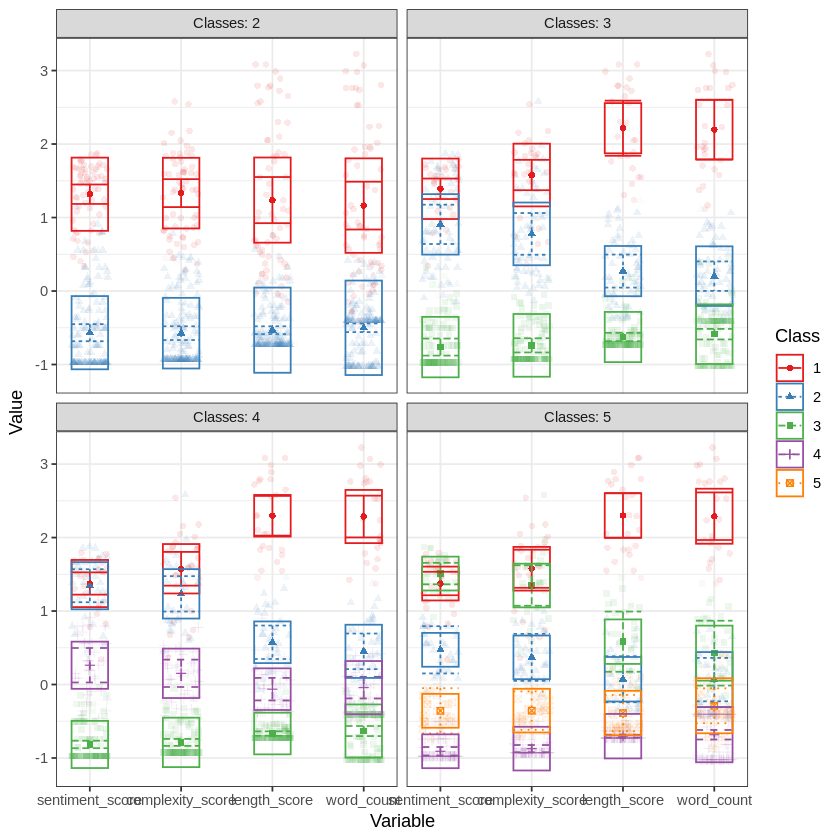

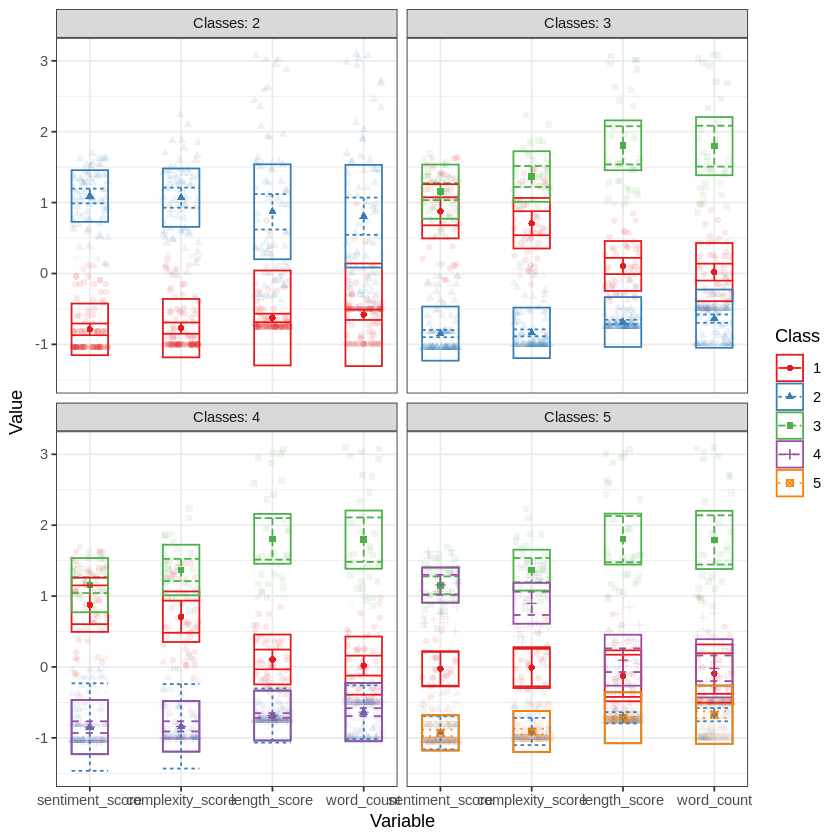

In [ ]:
vLPA_score_1 <- score_data_numeric1 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(2:5)

vLPA_score_2 <- score_data_numeric2 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(2:5)

vLPA_score_1
vLPA_score_2
plot_profiles(vLPA_score_1)
plot_profiles(vLPA_score_2)

# Group 1: the best class is class 3, as it has the best classification probabilities and the best entropy as well
# Group 2: the best class is class 3, because it has the best entropy with the lowest BIC and AIC, and the classes higher have empty values

In [ ]:
get_fit(vLPA_score_1)
get_fit(vLPA_score_2)

Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-805.9947,1637.9893,1787.933,1681.440,1694.440,1613.9465,1653.989,1640.2488,-1683.991,0.9785790,0.9841849,0.9992410,0.2966507,0.7033493,756.46629,0.00990099
1,3,-600.2926,1236.5851,1444.957,1296.747,1314.747,1202.5368,1257.585,1239.7136,-1301.510,0.9758655,0.9839124,0.9954189,0.1291866,0.5789474,411.40424,0.00990099
1,4,-485.8558,1017.7116,1284.523,1094.585,1117.585,973.6471,1043.712,1021.7091,-1103.617,0.9677645,0.9631023,0.9997428,0.1196172,0.5311005,228.87349,0.00990099
1,5,-458.1294,972.2587,1297.543,1065.844,1093.844,918.1451,1003.259,977.1252,-1084.370,0.9432145,0.8791233,0.9997697,0.1196172,0.4306220,55.45289,0.00990099


Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,-658.1704,1342.3408,1487.967,1383.6307,1396.631,1318.2942,1358.3408,1342.4621,-1385.989,0.9767270,0.9917420,0.9956562,0.4180791,0.5819209,6.888648e+02,0.00990099
1,3,-482.6888,1001.3776,1203.758,1058.5483,1076.548,967.3384,1022.3776,1001.5456,-1063.336,0.9803895,0.9869717,0.9907958,0.1864407,0.5367232,3.509632e+02,0.00990099
1,4,-482.6885,1011.3769,1271.023,1084.4283,1107.428,966.8333,1037.3769,1011.5915,-1176.571,0.7282142,0.0000000,0.9968654,0.0000000,0.5310734,6.709961e-04,0.01980198
1,5,-415.3787,886.7573,1203.054,975.6895,1003.690,832.3251,917.7573,887.0186,-1056.788,0.7838769,0.0000000,0.9994750,0.0000000,0.4745763,1.346196e+02,0.00990099


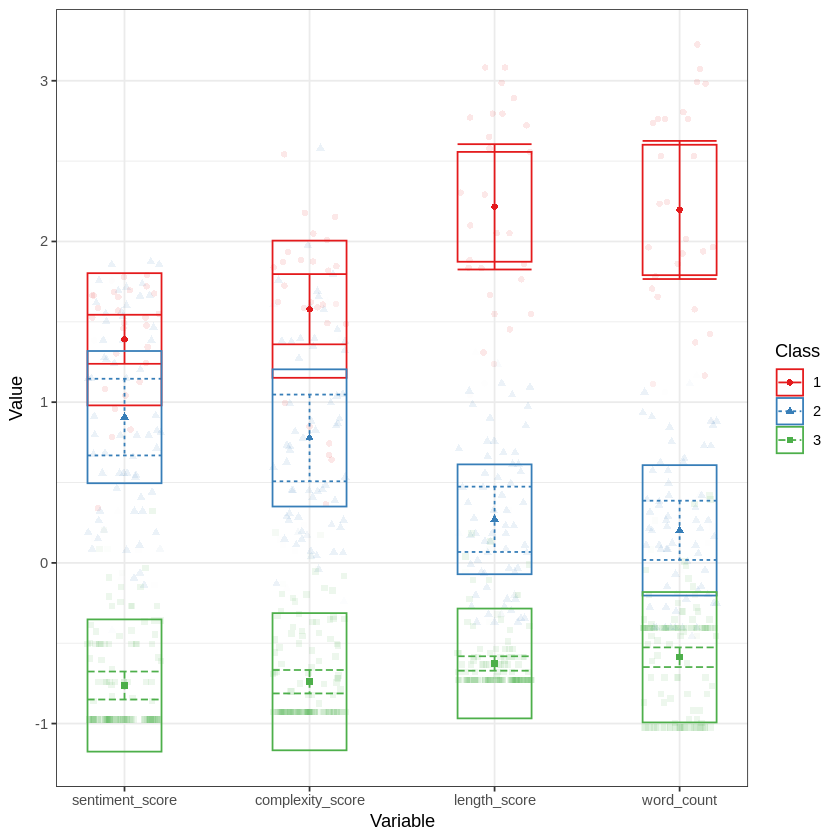

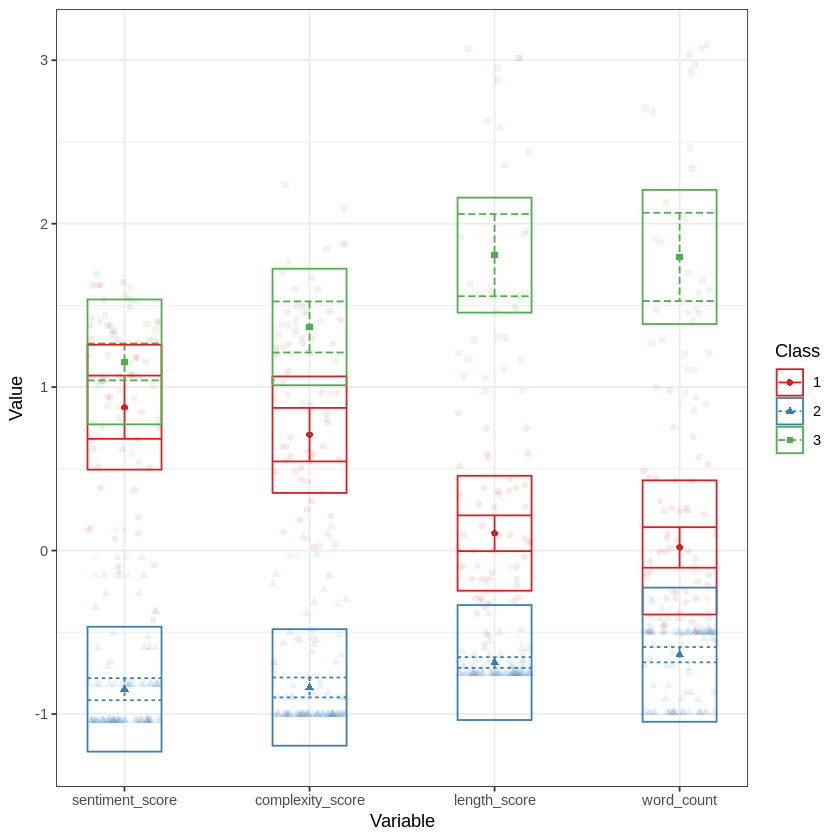

In [ ]:
lpa_score_plot1 <- score_data_numeric1 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(3)

lpa_score_plot2 <- score_data_numeric2 |>
  single_imputation() |>
  scale() |>
  estimate_profiles(3)

#Group 1 - 5 class solution
plot_profiles(lpa_score_plot1)

#Group 2 - 5 class solution"
plot_profiles(lpa_score_plot2)

In [ ]:
group_3class_comparison_standard <- rbind(
  # Group 1, Class 3
    get_data(vLPA_score_1) |>
    filter(classes_number == 3) |>
    group_by(Class) |>
    select(sentiment_score, complexity_score, length_score, word_count) |>
    summarize(across(everything(), list(mean = mean, sd = sd))) |>
    mutate(Group = "Group 1"),

  # Group 2, Class 3
  get_data(vLPA_score_2) |>
    filter(classes_number == 3) |>
    group_by(Class) |>
    select(sentiment_score, complexity_score, length_score, word_count) |>
    summarize(across(everything(), list(mean = mean, sd = sd))) |>
    mutate(Group = "Group 2")
)

group_3class_comparison_standard

Adding missing grouping variables: `Class`
Adding missing grouping variables: `Class`


Class,sentiment_score_mean,sentiment_score_sd,complexity_score_mean,complexity_score_sd,length_score_mean,length_score_sd,word_count_mean,word_count_sd,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1.3917860,0.3542276,1.5782271,0.5269546,2.2095103,0.5674534,2.18924089,0.6097688,Group 1
2,0.9044205,0.5886862,0.7727172,0.6011761,0.2669859,0.4340444,0.19630661,0.4197563,Group 1
3,-0.7665114,0.2927311,-0.7417180,0.2642767,-0.6276274,0.1856679,-0.58747279,0.3391569,Group 1
1,0.8720540,0.5476593,0.7059254,0.4695982,0.1080945,0.3612672,0.01954867,0.4000136,Group 2
2,-0.8523597,0.2858931,-0.8404928,0.2575940,-0.6864285,0.1260170,-0.63706467,0.2555629,Group 2
3,1.1588949,0.3062124,1.3714083,0.4062903,1.8155781,0.6553846,1.80494724,0.6986887,Group 2


In [ ]:
# 1. Run separate LPAs for each group
group1_score_data <- score_data_numeric1
group2_score_data <- score_data_numeric2

group1_score_lpa <- group1_score_data |>
  select(sentiment_score, complexity_score, length_score, word_count) |>
  estimate_profiles(n_profiles = 3)

group2_score_lpa <- group2_score_data |>
  select(sentiment_score, complexity_score, length_score, word_count) |>
  estimate_profiles(n_profiles = 3)

# 2. Compare profile means and proportions
get_profile_info <- function(lpa_result) {
  profile_means <- get_estimates(lpa_result) |>
    filter(Category == "Means") |>
    select(Class, Parameter, Estimate)

  profile_counts <- get_data(lpa_result) |>
    count(Class) |>
    mutate(Proportion = n / sum(n))

  list(means = profile_means, proportions = profile_counts)
}

group1_info <- get_profile_info(group1_score_lpa)
group2_info <- get_profile_info(group2_score_lpa)

# 3. Calculate profile similarity index
calculate_psi <- function(means1, means2) {
  # Reshape for easier comparison
  means1_wide <- means1 |>
    pivot_wider(names_from = Parameter, values_from = Estimate) |>
    arrange(Class)

  means2_wide <- means2 |>
    pivot_wider(names_from = Parameter, values_from = Estimate) |>
    arrange(Class)

  # Calculate similarity measures for each profile pair
  similarity_matrix <- matrix(NA, nrow = max(means1_wide$Class),
                             ncol = max(means2_wide$Class))

  for(i in 1:nrow(means1_wide)) {
    for(j in 1:nrow(means2_wide)) {
      profile1 <- means1_wide[i, -1] %>% as.numeric()
      profile2 <- means2_wide[j, -1] %>% as.numeric()

      # Calculate correlation
      similarity_matrix[i, j] <- cor(profile1, profile2)
    }
  }

  return(similarity_matrix)
}

profile_similarity <- calculate_psi(group1_info$means, group2_info$means)
print("Profile similarity matrix (correlations):")
print(profile_similarity)

# 4. Proportion similarity
prop_similarity <- sum(abs(group1_info$proportions$Proportion -
                          group2_info$proportions$Proportion)) / 2
print(paste("Proportion dissimilarity index:", prop_similarity))

[1] "Profile similarity matrix (correlations):"
          [,1]      [,2]      [,3]
[1,] 0.7675264 0.9294001 0.9955589
[2,] 0.9994139 0.5160924 0.7251298
[3,] 0.5271652 0.9991242 0.9703545
[1] "Proportion dissimilarity index: 0.392506690454951"


In [ ]:
# First, examine the profile means to determine engagement levels
print("Group 1 Profile Means:")
group1_means <- group1_info$means %>%
  pivot_wider(names_from = Parameter, values_from = Estimate)
print(group1_means)

print("Group 2 Profile Means:")
group2_means <- group2_info$means %>%
  pivot_wider(names_from = Parameter, values_from = Estimate)
print(group2_means)

# Find the best matching profiles based on the similarity matrix
best_matches <- apply(profile_similarity, 1, which.max)
print("Best matching profiles (Group 1 → Group 2):")
print(data.frame(Group1_Profile = 1:3,
                 Group2_Profile = best_matches,
                 Correlation = sapply(1:3, function(i) profile_similarity[i, best_matches[i]])))

# Assign engagement levels based on mean values
# For example, calculate overall mean of variables for each profile
group1_score_engagement <- group1_means %>%
  mutate(MeanScore = rowMeans(select(., -Class))) %>%
  arrange(desc(MeanScore)) %>%
  mutate(EngagementLevel = case_when(
    row_number() <= ceiling(n()/3) ~ "High",
    row_number() <= ceiling(2*n()/3) ~ "Moderate",
    TRUE ~ "Low"
  ))

group2_score_engagement <- group2_means %>%
  mutate(MeanScore = rowMeans(select(., -Class))) %>%
  arrange(desc(MeanScore)) %>%
  mutate(EngagementLevel = case_when(
    row_number() <= ceiling(n()/3) ~ "High",
    row_number() <= ceiling(2*n()/3) ~ "Moderate",
    TRUE ~ "Low"
  ))

print("Group 1 Engagement Levels:")
print(group1_score_engagement %>% select(Class, MeanScore, EngagementLevel))

print("Group 2 Engagement Levels:")
print(group2_score_engagement %>% select(Class, MeanScore, EngagementLevel))


[1] "Group 1 Profile Means:"
# A tibble: 3 × 5
  Class sentiment_score complexity_score length_score word_count
  <int>           <dbl>            <dbl>        <dbl>      <dbl>
1     1           3.86             2.81        0.472       4.81 
2     2           3.07             1.91        0.160       1.83 
3     3           0.347            0.211       0.0164      0.651
[1] "Group 2 Profile Means:"
# A tibble: 3 × 5
  Class sentiment_score complexity_score length_score word_count
  <int>           <dbl>            <dbl>        <dbl>      <dbl>
1     1           3.32             2.01        0.171       1.89 
2     2           0.332            0.192       0.0130      0.663
3     3           3.80             2.79        0.512       5.22 
[1] "Best matching profiles (Group 1 → Group 2):"
  Group1_Profile Group2_Profile Correlation
1              1              3   0.9955589
2              2              1   0.9994139
3              3              2   0.9991242
[1] "Group 1 Engagement Levels

In [ ]:
score_engage_class_g1 <- get_data(vLPA_score_1) |>
    filter(classes_number == 3, Class_prob == 3) |>
    mutate(Engage_Class = case_when(
              Class == 1 ~ "High",
              Class == 2 ~ "Moderate",
              Class == 3 ~ "Low"),
          Group = "Group 1")

score_engage_class_g2 <- get_data(vLPA_score_2) |>
    filter(classes_number == 4, Class_prob == 4) |>
    mutate(Engage_Class = case_when(
              Class == 3 ~ "High",
              Class == 1 ~ "Moderate",
              Class == 2 ~ "Low"),
          Group = "Group 2")

head(score_engage_class_g1)
head(score_engage_class_g2)

model_number,classes_number,sentiment_score,complexity_score,length_score,word_count,Class,Class_prob,Probability,id,Engage_Class,Group
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>
1,3,1.6862272,1.9350985,3.0825957,3.0712116,1,3,7.447495e-57,1,High,Group 1
1,3,-0.9760942,-0.9273569,-0.7281839,-0.5765137,3,3,1.000000e+00,2,Low,Group 1
1,3,1.1482868,0.8957627,0.1825685,0.1101170,2,3,4.782694e-10,3,Moderate,Group 1
1,3,1.6963771,2.0104624,2.7949897,2.7622278,1,3,5.073612e-52,4,High,Group 1
1,3,-0.9760942,-0.9273569,-0.7281839,-0.9970749,3,3,1.000000e+00,5,Low,Group 1
1,3,1.7360322,1.7583361,0.4941417,0.2903575,2,3,4.223586e-17,6,Moderate,Group 1


model_number,classes_number,sentiment_score,complexity_score,length_score,word_count,Class,Class_prob,Probability,id,Engage_Class,Group
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>
1,4,-0.2634572,-0.5208088,-0.4811422,-0.7035500,2,4,3.689892e-01,1,Low,Group 2
1,4,-1.0393723,-1.0009021,-0.7498733,-0.4981481,2,4,3.715926e-01,2,Low,Group 2
1,4,-1.0393723,-1.0009021,-0.7498733,-0.4981481,2,4,3.715926e-01,3,Low,Group 2
1,4,1.2972458,0.8904044,0.8433183,0.7548038,1,4,1.831406e-17,4,Moderate,Group 2
1,4,1.0714363,1.5987871,2.3597295,2.3363989,3,4,5.233593e-43,5,High,Group 2
1,4,1.4006124,0.5046968,-0.3275816,-0.4981481,1,4,1.434135e-10,6,Moderate,Group 2


In [ ]:
rbind(score_engage_class_g1,score_engage_class_g2) |>
    group_by(Engage_Class, Group) |>
    summarize(across(c(sentiment_score, complexity_score, length_score, word_count), list(mean = mean, sd = sd)))

`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.


Engage_Class,Group,sentiment_score_mean,sentiment_score_sd,complexity_score_mean,complexity_score_sd,length_score_mean,length_score_sd,word_count_mean,word_count_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,1.3917860,0.3587403,1.5782271,0.5336676,2.2095103,0.5746824,2.18924089,0.6175369
High,Group 2,1.1588949,0.3093857,1.3714083,0.4105007,1.8155781,0.6621763,1.80494724,0.7059292
Low,Group 1,-0.7665114,0.2935431,-0.7417180,0.2650098,-0.6276274,0.1861829,-0.58747279,0.3400977
Low,Group 2,-0.8598093,0.2790536,-0.8501476,0.2420601,-0.6910628,0.1187545,-0.64247574,0.2523319
Moderate,Group 1,0.9044205,0.5919476,0.7727172,0.6045067,0.2669859,0.4364491,0.19630661,0.4220818
Moderate,Group 2,0.8515708,0.5646843,0.6931481,0.4766396,0.1009166,0.3635963,0.01658921,0.3991995


In [ ]:
# Add row numbers as IDs to the clean original dataset
score_categories1iqr <- score_categories1iqr |>
    mutate(id = row_number(), Group = "Group 1")

score_categories2iqr <- score_categories2iqr |>
    mutate(id = row_number(), Group = "Group 2")

# Group 1
class_score_mapping_1 <-  score_engage_class_g1 |>
    dplyr::select(Engage_Class, id)

# Group 2
class_score_mapping_2 <-  score_engage_class_g2 |>
    dplyr::select(Engage_Class, id)

#Join Class allocation with original data set
original_score_with_class1 <- score_categories1iqr |>
    left_join(class_score_mapping_1, by = "id")

original_score_with_class2 <- score_categories2iqr |>
    left_join(class_score_mapping_2, by = "id")

#Summarizes means of the different page types according the class/profile
class_means_1 <- original_score_with_class1 |>
    group_by(Engage_Class, Group) |> #produces warning but it's not an issue, i wanted to group by class but it would remove the group in later steps
    summarize(across(c(sentiment_score, complexity_score, length_score, word_count), mean))

class_means_2 <- original_score_with_class2 |>
    group_by(Engage_Class, Group) |>
    summarize(across(c(sentiment_score, complexity_score, length_score, word_count), mean))

class_means_1
class_means_2

`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Engage_Class'. You can override using the
`.groups` argument.


Engage_Class,Group,sentiment_score,complexity_score,length_score,word_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,3.8583044,2.8131657,0.47142925,4.7979582
Low,Group 1,0.3415014,0.2084276,0.01613689,0.6502967
Moderate,Group 1,3.0641745,1.9087727,0.15970080,1.8210518


Engage_Class,Group,sentiment_score,complexity_score,length_score,word_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 2,3.8116472,2.7937646,0.51404429,5.2356255
Low,Group 2,0.3113502,0.1775368,0.01178396,0.6528232
Moderate,Group 2,3.2787679,1.9950077,0.17047436,1.8869231


Engage_Class,Group,sentiment_score,complexity_score,length_score,word_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,Group 1,3.8583044,2.8131657,0.47142925,4.7979582
Low,Group 1,0.3415014,0.2084276,0.01613689,0.6502967
Moderate,Group 1,3.0641745,1.9087727,0.15970080,1.8210518
High,Group 2,3.8116472,2.7937646,0.51404429,5.2356255
Low,Group 2,0.3113502,0.1775368,0.01178396,0.6528232
Moderate,Group 2,3.2787679,1.9950077,0.17047436,1.8869231


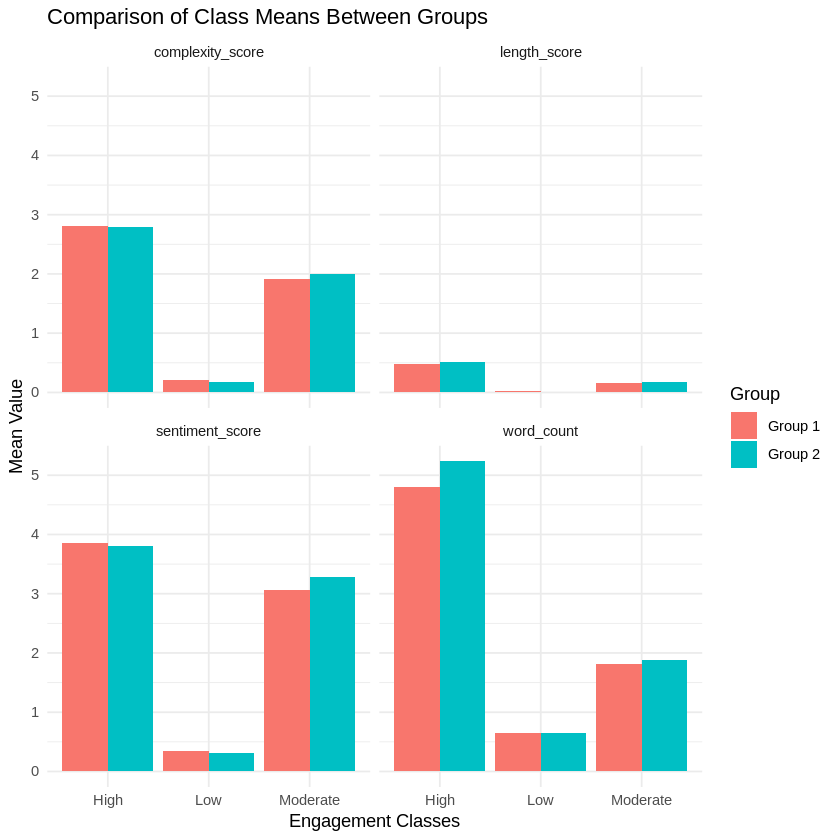

In [ ]:
# Combine the class means from both groups
scores_all_class_means <- rbind(class_means_1, class_means_2)

# Pivot to long format for plotting
scores_class_means_long <- scores_all_class_means |>
    pivot_longer(cols = c(sentiment_score, complexity_score, length_score, word_count),
                names_to = "Category", values_to = "Value")

# Create a bar chart comparison faceted by variable
ggplot(scores_class_means_long, aes(x = factor(Engage_Class), y = Value, fill = Group)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~Category) +
    theme_minimal() +
    labs(title = "Comparison of Class Means Between Groups",
        y = "Mean Value",
        x = "Engagement Classes")

scores_all_class_means

In [ ]:
# Add engagement classification to original datasets
group1_with_score_engagement <- dplyr::left_join(
  get_data(group1_score_lpa),
  group1_score_engagement %>% select(Class, EngagementLevel),
  by = "Class"  # Now using Class as the joining column
)

group2_with_score_engagement <- dplyr::left_join(
  get_data(group2_score_lpa),
  group2_score_engagement %>% select(Class, EngagementLevel),
  by = "Class"  # Now using Class as the joining column
)

# Combine both groups into one dataset with engagement levels
combined_data <- bind_rows(
  group1_with_score_engagement %>% mutate(Group = "Group1"),
  group2_with_score_engagement %>% mutate(Group = "Group2")
)

head(combined_data)

model_number,classes_number,sentiment_score,complexity_score,length_score,word_count,CPROB1,CPROB2,CPROB3,Class,EngagementLevel,Group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,3,4.338077,3.213846,0.6115385,6.11538462,1.000000e+00,1.240559e-25,7.447495e-57,1,High,Group1
1,3,0.000000,0.000000,0.0000000,0.66666667,3.497869e-42,1.418323e-11,1.000000e+00,3,Low,Group1
1,3,3.461538,2.046923,0.1461538,1.69230769,5.201447e-15,1.000000e+00,4.782694e-10,2,Moderate,Group1
1,3,4.354615,3.298462,0.5653846,5.65384615,1.000000e+00,4.371672e-22,5.073612e-52,1,High,Group1
1,3,0.000000,0.000000,0.0000000,0.03846154,2.864860e-45,1.888691e-12,1.000000e+00,3,Low,Group1
1,3,4.419231,3.015385,0.1961538,1.96153846,1.981001e-09,1.000000e+00,4.223586e-17,2,Moderate,Group1


#### Statistical Testing

##### Mann-Whitney U Test (Fails)

In [ ]:
# Assuming you have combined data with Group and Class variables
# First, run the tests for each variable across all profiles

# Assuming you have combined data with Group and Engage_Class variables
# Create a function to run Mann-Whitney U test by profile (I did it again cuz sometimes the run time cuts out from the initialization of this formula before i can run it a second time here)
mw_test_by_profile <- function(var_name, profile_category, data) {
    # Filter data for the specific profile
    profile_data <- data |> filter(EngagementLevel == profile_category)

    # Get actual sample sizes
    n_group1 <- sum(profile_data$Group == "Group1")
    n_group2 <- sum(profile_data$Group == "Group2")

    # If either group has no data, return NA
    if (n_group1 == 0 || n_group2 == 0) {
        return(list(
            Variable = var_name,
            Profile = profile_category,
            W = NA,
            p_value = NA,
            effect_size = NA,
            n_group1 = n_group1,
            n_group2 = n_group2,
            interpretation = "Insufficient data"
        ))
    }

    # Run the test
    formula <- as.formula(paste(var_name, "~ Group"))
    test_result <- tryCatch({
        wilcox.test(formula, data = profile_data, exact = FALSE, correct = TRUE)
    }, error = function(e) {
        return(NULL)
    })

    # If test failed, return NA
    if (is.null(test_result)) {
        return(list(
            Variable = var_name,
            Profile = profile_category,
            W = NA,
            p_value = NA,
            effect_size = NA,
            n_group1 = n_group1,
            n_group2 = n_group2,
            interpretation = "Test failed"
        ))
    }

    # Calculate effect size using r = Z/sqrt(N)
    # First get Z from the p-value
    z <- qnorm(test_result$p.value/2)

    # Then calculate effect size r
    r <- abs(z) / sqrt(n_group1 + n_group2)

    # Return results
    return(list(
        Variable = var_name,
        Profile = profile_category,
        W = test_result$statistic,
        p_value = test_result$p.value,
        effect_size = r,
        n_group1 = n_group1,
        n_group2 = n_group2,
        interpretation = case_when(
            r < 0.1 ~ "Negligible effect",
            r < 0.3 ~ "Small effect",
            r < 0.5 ~ "Medium effect",
            TRUE ~ "Large effect"
        )
    ))
}

# Define variables and profiles
variables <- c("sentiment_score", "complexity_score", "length_score", "word_count")
profiles <- c("High", "Moderate", "Low")

# Run tests for all combinations
results_list <- list()
for (var in variables) {
    for (prof in profiles) {
        results_list[[length(results_list) + 1]] <- mw_test_by_profile(var, prof, combined_data)
    }
}

# Convert to data frame
profile_results <- do.call(rbind, lapply(results_list, function(x) data.frame(x)))

# Print results in a nicely formatted table
profile_results |>
    arrange(Profile, Variable) |>
    knitr::kable(digits = 3)



|    |Variable         |Profile  |      W| p_value| effect_size| n_group1| n_group2|interpretation    |
|:---|:----------------|:--------|------:|-------:|-----------:|--------:|--------:|:-----------------|
|W3  |complexity_score |High     |  501.0|   0.414|       0.106|       27|       33|Small effect      |
|W6  |length_score     |High     |  383.5|   0.361|       0.118|       27|       33|Small effect      |
|W   |sentiment_score  |High     |  483.0|   0.582|       0.071|       27|       33|Negligible effect |
|W9  |word_count       |High     |  373.5|   0.288|       0.137|       27|       33|Small effect      |
|W5  |complexity_score |Low      | 5962.5|   0.600|       0.036|      121|       95|Negligible effect |
|W8  |length_score     |Low      | 6022.5|   0.502|       0.046|      121|       95|Negligible effect |
|W2  |sentiment_score  |Low      | 5896.5|   0.716|       0.025|      121|       95|Negligible effect |
|W11 |word_count       |Low      | 5673.5|   0.868|       0.01

**High engagement profile:**

*   small effect size for all but sentiment (which is negligible)
*   not statistically significant
---

**Moderate engagement profile:**

* small effect size for complexity and sentiment, negligible everywhere else
* not statistically significant

**Low engagement profile:**
---
* all negligible


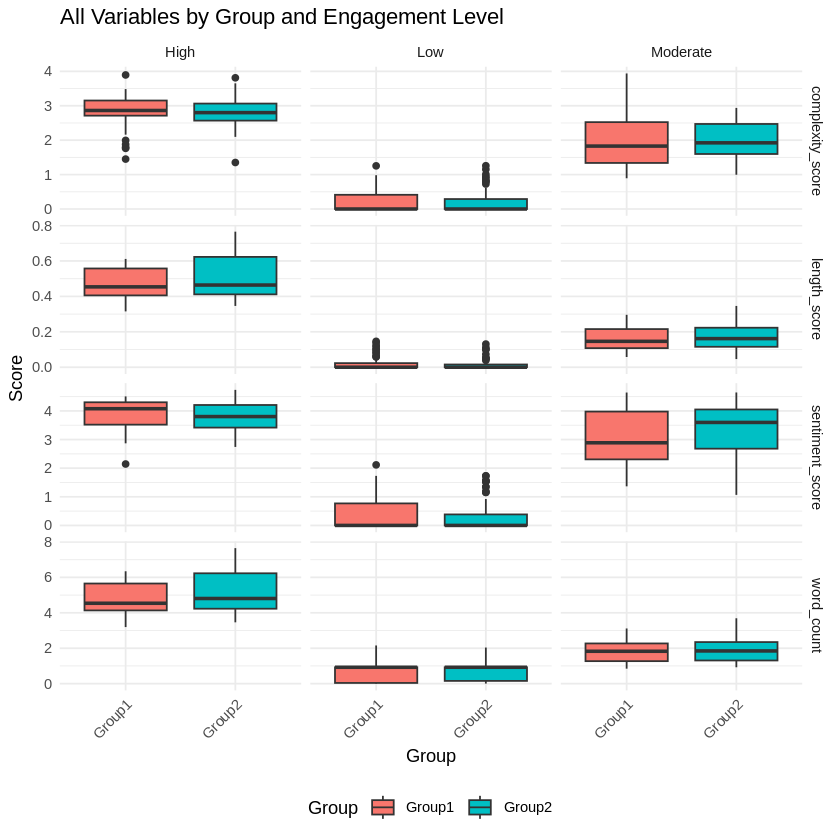

In [ ]:
library(ggplot2)
library(dplyr)


#box plot for all variables to compare patterns
long_data <- combined_data %>%
  tidyr::pivot_longer(cols = c(sentiment_score, complexity_score, length_score, word_count),
                      names_to = "Variable", values_to = "Value")

all_vars_plot <- ggplot(long_data, aes(x = Group, y = Value, fill = Group)) +
  geom_boxplot() +
  facet_grid(Variable ~ EngagementLevel, scales = "free_y") +
  theme_minimal() +
  labs(title = "All Variables by Group and Engagement Level",
       y = "Score") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plots
print(all_vars_plot)

##### Chi-Square test

In [ ]:
# Create a contingency table of Group vs. EngagementLevel
engagement_table <- table(combined_data$Group, combined_data$EngagementLevel)

# View the table
print(engagement_table)

# Calculate percentages within each group
prop_table <- prop.table(engagement_table, margin = 1) * 100
print(round(prop_table, 2)) # Rounded to 2 decimal places

# Perform chi-square test
chi_test <- chisq.test(engagement_table)
print(chi_test)

# Check if expected cell counts are adequate
print(chi_test$expected)

        
         High Low Moderate
  Group1   27 121       61
  Group2   33  95       49
        
          High   Low Moderate
  Group1 12.92 57.89    29.19
  Group2 18.64 53.67    27.68

	Pearson's Chi-squared test

data:  engagement_table
X-squared = 2.4024, df = 2, p-value = 0.3008

        
             High       Low Moderate
  Group1 32.48705 116.95337 59.55959
  Group2 27.51295  99.04663 50.44041


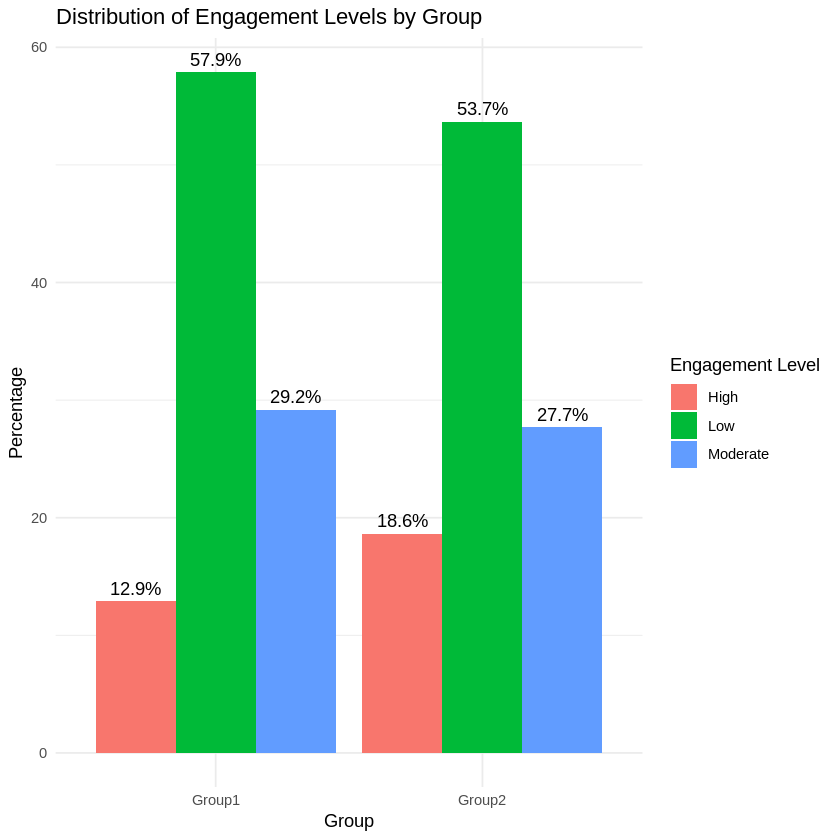

In [ ]:
library(ggplot2)

# Create a summary dataframe for plotting
engagement_summary <- combined_data %>%
  group_by(Group, EngagementLevel) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Group) %>%
  mutate(Percentage = Count / sum(Count) * 100)

# Plot the distribution
ggplot(engagement_summary, aes(x = Group, y = Percentage, fill = EngagementLevel)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = sprintf("%.1f%%", Percentage)),
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Distribution of Engagement Levels by Group",
       y = "Percentage",
       fill = "Engagement Level") +
  theme_minimal()

In [ ]:
# Post-hoc analysis with adjusted residuals
# Residuals > 1.96 or < -1.96 indicate significant deviations
residuals <- chi_test$residuals
print("Standardized residuals:")
print(residuals)

# Or conduct separate proportion tests for each engagement level
for (level in unique(combined_data$EngagementLevel)) {
  level_data <- combined_data %>%
    mutate(is_level = EngagementLevel == level)

  prop_test <- prop.test(
    x = table(level_data$Group, level_data$is_level)[, "TRUE"],
    n = table(level_data$Group)
  )

  cat("\nProportion test for", level, "engagement:\n")
  print(prop_test)
}

[1] "Standardized residuals:"
        
               High        Low   Moderate
  Group1 -0.9626835  0.3741858  0.1866430
  Group2  1.0460924 -0.4066061 -0.2028141

Proportion test for High engagement:

	2-sample test for equality of proportions with continuity correction

data:  table(level_data$Group, level_data$is_level)[, "TRUE"] out of table(level_data$Group)
X-squared = 1.9768, df = 1, p-value = 0.1597
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1356810  0.0211729
sample estimates:
   prop 1    prop 2 
0.1291866 0.1864407 


Proportion test for Low engagement:

	2-sample test for equality of proportions with continuity correction

data:  table(level_data$Group, level_data$is_level)[, "TRUE"] out of table(level_data$Group)
X-squared = 0.53256, df = 1, p-value = 0.4655
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06237614  0.14682455
sample estimates:
   prop 1    prop 2 
0.5789474 0.5367232 


Proportion test for Moderate engagem

**low profile**

Non-significant p-value (p = 0.61)

Group1 has 52.1% in low engagement

Group2 has 49.0% in low engagement

The 3.1 percentage point difference is not statistically significant

---

**high profile**

Marginally non-significant p-value (p = 0.075)

Group1 has 29.7% in high engagement

Group2 has 38.8% in high engagement

This 9.1 percentage point difference approaches significance but doesn't reach the conventional threshold of 0.05

---

**moderate profile**

Non-significant p-value (p = 0.13)

Group1 has 18.2% in moderate engagement

Group2 has 12.2% in moderate engagement

This 6.0 percentage point difference is not statistically significant

## Mapping profiles back to Original Dataset

In [ ]:
mapping_time_engagement1 <- group1_with_engagement |>
    mutate(id = row_number()) |>
    select(id, EngagementLevel)

mapping_time_engagement2 <- group2_with_engagement |>
    mutate(id = row_number()) |>
    select(id, EngagementLevel)

time_people1 <- time_categorized_1iqr |>
    mutate(id = row_number()) |>
    select(person_name, id)

time_people2 <- time_categorized_2iqr |>
    mutate(id = row_number()) |>
    select(person_name, id)

# Join time engagement mapping with person names for group 1
time_engagement_people1 <- left_join(
  mapping_time_engagement1,
  time_people1,
  by = "id"
  ) |>
  select(-id)

# Join time engagement mapping with person names for group 2
time_engagement_people2 <- left_join(
  mapping_time_engagement2,
  time_people2,
  by = "id"
  ) |>
  select(-id)

head(time_engagement_people1)
head(time_engagement_people2)

EngagementLevel,person_name
<chr>,<chr>
Low,Person 102
Low,Person 104
Low,Person 105
Low,Person 106
Low,Person 107
Low,Person 108


EngagementLevel,person_name
<chr>,<chr>
Moderate,Person 224
Moderate,Person 225
Moderate,Person 226
Moderate,Person 227
Moderate,Person 228
Moderate,Person 230


In [ ]:
mapping_score_engagement1 <- group1_with_score_engagement |>
    mutate(id = row_number()) |>
    select(id, EngagementLevel)

mapping_score_engagement2 <- group2_with_score_engagement |>
    mutate(id = row_number()) |>
    select(id, EngagementLevel)

score_people1 <- score_categories1iqr |>
    mutate(id = row_number()) |>
    select(person_name, id)

score_people2 <- score_categories2iqr |>
    mutate(id = row_number()) |>
    select(person_name, id)

# Join time engagement mapping with person names for group 1
score_engagement_people1 <- left_join(
  mapping_score_engagement1,
  score_people1,
  by = "id"
  ) |>
  select(-id)

# Join time engagement mapping with person names for group 2
score_engagement_people2 <- left_join(
  mapping_score_engagement2,
  score_people2,
  by = "id"
  ) |>
  select(-id)

head(score_engagement_people1)
head(score_engagement_people2)

EngagementLevel,person_name
<chr>,<chr>
High,Person 1
Low,Person 10
Moderate,Person 100
High,Person 101
Low,Person 102
Moderate,Person 103


EngagementLevel,person_name
<chr>,<chr>
Low,Person 223
Low,Person 224
Low,Person 225
Moderate,Person 226
High,Person 227
Moderate,Person 228


In [ ]:
combined_engagement1 <- inner_join(
  score_engagement_people1,
  time_engagement_people1,
  by = "person_name",
  suffix = c("_score", "_time")
) |>
  mutate(Group = "Group1")

combined_engagement2 <- inner_join(
  score_engagement_people2,
  time_engagement_people2,
  by = "person_name",
  suffix = c("_score", "_time")
) |>
  mutate(Group = "Group2")

head(combined_engagement1)
head(combined_engagement2)

EngagementLevel_score,person_name,EngagementLevel_time,Group
<chr>,<chr>,<chr>,<chr>
Low,Person 102,Low,Group1
Low,Person 104,Low,Group1
Low,Person 105,Low,Group1
Low,Person 106,Low,Group1
Low,Person 107,Low,Group1
Low,Person 108,Low,Group1


EngagementLevel_score,person_name,EngagementLevel_time,Group
<chr>,<chr>,<chr>,<chr>
Low,Person 224,Moderate,Group2
Low,Person 225,Moderate,Group2
Moderate,Person 226,Moderate,Group2
High,Person 227,Moderate,Group2
Moderate,Person 228,Moderate,Group2
Low,Person 231,Moderate,Group2


In [ ]:
# For Group 1
# Create a contingency table
contingency_table1 <- table(combined_engagement1$EngagementLevel_score,
                            combined_engagement1$EngagementLevel_time)

# View the table
print(contingency_table1)

# Run chi-square test
chi_test1 <- chisq.test(contingency_table1)
print(chi_test1)

# For Group 2
contingency_table2 <- table(combined_engagement2$EngagementLevel_score,
                            combined_engagement2$EngagementLevel_time)
print(contingency_table2)

chi_test2 <- chisq.test(contingency_table2)
print(chi_test2)

          
           High Low Moderate
  High        7   5        5
  Low        10  76       20
  Moderate    8  27        7


Warning message in chisq.test(contingency_table1):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  contingency_table1
X-squared = 15.377, df = 4, p-value = 0.00398

          
           High Low Moderate
  High        5   0       20
  Low         5  32       41
  Moderate    5   4       26


Warning message in chisq.test(contingency_table2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  contingency_table2
X-squared = 22.998, df = 4, p-value = 0.0001268



Warning message in chisq.test(contingency_table1):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency_table2):
“Chi-squared approximation may be incorrect”


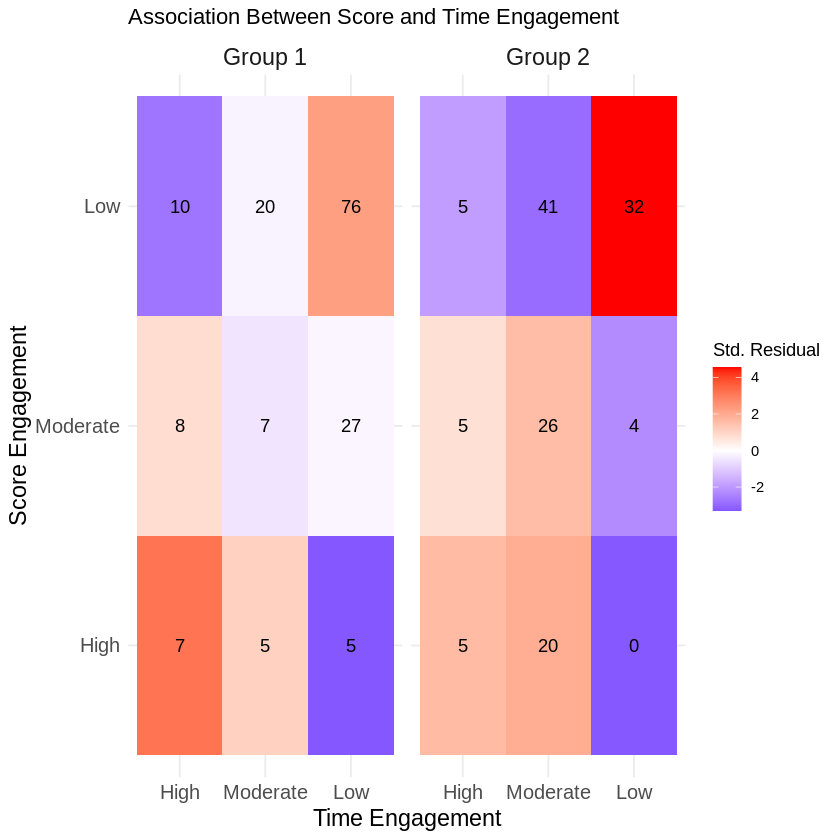

In [ ]:

# Using ggplot2 for a heatmap visualization (no reshape2 required)
# First, prepare the data
library(ggplot2)

# For Group 1
plot_data1 <- as.data.frame(as.table(contingency_table1))
names(plot_data1) <- c("ScoreEngagement", "TimeEngagement", "Freq")
plot_data1$StdResid <- as.vector(chisq.test(contingency_table1)$stdres)
plot_data1$Group <- "Group 1"

# For Group 2
plot_data2 <- as.data.frame(as.table(contingency_table2))
names(plot_data2) <- c("ScoreEngagement", "TimeEngagement", "Freq")
plot_data2$StdResid <- as.vector(chisq.test(contingency_table2)$stdres)
plot_data2$Group <- "Group 2"

# Combine the data
plot_data <- rbind(plot_data1, plot_data2)

# Order factors
plot_data$ScoreEngagement <- factor(plot_data$ScoreEngagement,
                                    levels=c("High", "Moderate", "Low"))
plot_data$TimeEngagement <- factor(plot_data$TimeEngagement,
                                   levels=c("High", "Moderate", "Low"))

# Create heatmap
ggplot(plot_data, aes(x=TimeEngagement, y=ScoreEngagement, fill=StdResid)) +
  geom_tile() +
  geom_text(aes(label=Freq), color="black") +
  scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0) +
  facet_wrap(~Group) +
  labs(title="Association Between Score and Time Engagement",
       x="Time Engagement", y="Score Engagement",
       fill="Std. Residual") +
  theme_minimal() +
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14),
        strip.text=element_text(size=14),
        legend.position="right")

In [ ]:
fisher.test(contingency_table1)
fisher.test(contingency_table2)


# For Group 1:

# p-value = 0.1885 (not significant)
# There's no statistically significant association between score engagement and time engagement
# Student effort (scores) and time spent appear to be independent dimensions of engagement

# For Group 2:

# p-value = 0.000002558 (highly significant)
# There's a very strong association between score engagement and time engagement
# How students engage in terms of effort is strongly related to how they allocate their time


	Fisher's Exact Test for Count Data

data:  contingency_table1
p-value = 0.6181
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  contingency_table2
p-value = 4.375e-07
alternative hypothesis: two.sided


In [ ]:
# Combine both datasets
all_engagement <- bind_rows(combined_engagement1, combined_engagement2)

# Create a 3-way table
three_way_table <- table(all_engagement$EngagementLevel_score,
                         all_engagement$EngagementLevel_time,
                         all_engagement$Group)

# Run tests for each group
lapply(1:2, function(i) {
  group_table <- three_way_table[,,i]
  test <- chisq.test(group_table)
  return(test)
})

# Or directly compare the distribution patterns between groups
pattern_table <- table(
  paste(all_engagement$EngagementLevel_score,
        all_engagement$EngagementLevel_time,
        sep="-"),
  all_engagement$Group
)

group_pattern_test <- chisq.test(pattern_table)
print(group_pattern_test)

Warning message in chisq.test(group_table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(group_table):
“Chi-squared approximation may be incorrect”


[[1]]

	Pearson's Chi-squared test

data:  group_table
X-squared = 2.6147, df = 4, p-value = 0.6242


[[2]]

	Pearson's Chi-squared test

data:  group_table
X-squared = 28.468, df = 4, p-value = 1.002e-05



Warning message in chisq.test(pattern_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  pattern_table
X-squared = 47.931, df = 8, p-value = 1.018e-07



## How to do LPA

In [ ]:
install.packages("tidyLPA")
library(tidyLPA)
library(dplyr)

Ensure that the data set has each row as a unique person, with variables of interest as the columns

In [ ]:
#insert dataset at blank
vLPA <- ____original dataset____ |>
    single_imputation() |>
    scale() |>
    estimate_profiles(2:6) # insert the range of profiles to test

vLPA
plot_profiles(vLPA)

Looking for lower AIC & BIC, when the values start plateauing. Look for Entropy > 0.8 as this means there is a goodseparation between the profiles, and looking for low p values for significance.

In [ ]:
#Loading perfered profile
LPA <- ___original dataset_____ |>
  select(______, _______) |> #select only the variables of interest
  estimate_profiles(n_profiles = __)

INFO <- get_profile_info(LPA)

LPA_means <- INFO$means |>
  pivot_wider(names_from = Parameter, values_from = Estimate)

print(LPA_means)

In [ ]:
# Assign engagement levels based on mean values
# For example, calculate overall mean of variables for each profile
LPA_engagement <- LPA_means |>
  mutate(MeanScore = rowMeans(select(., -Class))) |>
  arrange(desc(MeanScore)) |>
  mutate(EngagementLevel = case_when(
    row_number() <= ceiling(n()/3) ~ "High",
    row_number() <= ceiling(2*n()/3) ~ "Moderate",
    TRUE ~ "Low"
  ))

In [ ]:
#maps assigned engagement levels to profile dataset
LPA_engage_with_class <- get_data(LPA) |>
    filter(classes_number == 5, Class_prob == 5) |>
    mutate(Engage_Class = case_when(
              Class %in% c(_,_) ~ "High",
              Class %in% c(_,_) ~ "Moderate",
              Class == _ ~ "Low"))

In [ ]:
#maps the engagement profiles to original person

# Add row numbers as IDs to the clean original dataset
data_select <- ______original dataset_____ |>
    mutate(id = row_number(), Group = "Group 1")

class_mapping <-  LPA_engage_with_class |>
    dplyr::select(Engage_Class, id)

#Join Class allocation with original data set
original_with_class <- data_select |>
    left_join(class_mapping, by = "id")

This will provide the engagement profiles for a single module across all time, with the intentions of comparing engagement in other modules.